In [ ]:
%pip install torch matplotlib numpy scipy tensorflow tensorflow-probability tf-keras


In [8]:
import warnings
warnings.filterwarnings('ignore', message='urllib3 v2 only supports OpenSSL')
warnings.filterwarnings('ignore', category=DeprecationWarning)


# Maximum Likelihood

## 1. Introduction

### Problem Statement

Maximum Likelihood Estimation (MLE) is a fundamental statistical method [1] used to estimate the parameters of a statistical model. Given observed data, the core idea behind MLE is to find the parameter values that maximize the likelihood, meaning the probability of the observed data under those parameters.

**Why do we need Maximum Likelihood?**

In real-world applications, we often observe data generated by some unknown process. We want to model this process using a probabilistic distribution, but we don't know the parameters of that distribution. MLE provides a principled, systematic way [2] to estimate these parameters directly from the observed data.

### Applications in Computer Science

MLE is extensively used across various Computer Science domains:

**1. Machine Learning:**
- Training neural networks (weight optimization)
- Logistic regression for binary classification
- Gaussian Mixture Models for clustering
- Hidden Markov Models for sequence modeling

**2. Natural Language Processing:**
- Language model parameter estimation
- N-gram probability estimation
- Word embedding training
- Machine translation models

**3. Computer Vision:**
- Image noise reduction (Gaussian noise modeling)
- Object detection and recognition
- Image segmentation
- Feature extraction

**4. Data Science and Statistics:**
- A/B testing and hypothesis testing
- Time series forecasting
- Anomaly detection
- Recommendation systems

**5. Bioinformatics:**
- Gene expression analysis
- Evolutionary parameter estimation
- Protein structure prediction

### Computer Science Problems Solved by MLE

1. **Parameter Estimation:** Finding optimal model parameters from data
2. **Model Selection:** Comparing different probabilistic models
3. **Prediction:** Making informed predictions about unseen data
4. **Classification:** Distinguishing between different classes (spam vs. not spam)
5. **Regression:** Predicting continuous values based on input features
6. **Density Estimation:** Estimating probability distributions from data
7. **Missing Data Imputation:** Filling in missing values using probabilistic models

### Mathematical Foundation

The fundamental principle of MLE is to find parameter $\theta$ that maximizes:

$$
\hat{\theta} = \arg\max_{\theta} P(X|\theta)
$$

where $X$ represents our observed data, and $P(X|\theta)$ is the likelihood function.

This approach transforms the problem of parameter estimation into an optimization problem, which can be solved using calculus (setting derivatives to zero) or numerical optimization methods (gradient descent).

## 2. Theoretical Foundations & Implementations

This section presents the core concepts of Maximum Likelihood Estimation, organized from fundamental definitions to specific distribution estimators. Each formula includes:
- **Detailed Explanation:** Intuitive understanding of the concept
- **Detailed Derivation:** Mathematical proof and reasoning
- **Concrete Example:** Real-world application with numerical calculations
- **Python Implementation:** Verification through code

## 2.1. Likelihood Function

The likelihood function for a parameter $\theta$, given observed data $X$, is defined as [1]:

$$
L(\theta) = P(X|\theta)
$$

### Detailed Explanation:

This formula expresses the probability of observing the given data $X$, assuming the parameter $\theta$ is known. The goal of Maximum Likelihood Estimation (MLE) is to find the parameter value that maximizes this likelihood function.

### Derivation:

To better understand the likelihood function, we can start from **Bayes' Rule** [1]:

$$
P(\theta|X) = \frac{P(X|\theta)P(\theta)}{P(X)}
$$

This equation gives the **posterior probability** of the parameter $\theta$ after observing data $X$, in terms of:

- **Likelihood**: $P(X|\theta)$ — how probable the data is given the parameter.
- **Prior**: $P(\theta)$ — our prior belief about the parameter before seeing the data.
- **Marginal likelihood**: $P(X)$ — the total probability of the data (a normalizing constant).

Now, suppose we want to **find the value of $\theta$ that is most probable after observing $X$**. That means:

$$
\arg\max_{\theta} P(\theta|X)
$$

By Bayes' rule, this is equivalent to:

$$
\arg\max_{\theta} \frac{P(X|\theta)P(\theta)}{P(X)}
$$

Since $P(X)$ **does not depend on $\theta$**, it can be treated as a constant during optimization:

$$
\arg\max_{\theta} P(\theta|X) = \arg\max_{\theta} P(X|\theta)P(\theta)
$$

At this point, if we assume that we have **no prior preference** about $\theta$ (i.e. $P(\theta)$ is uniform — a so-called **uninformative prior**), then $P(\theta)$ is also constant, and we can drop it too:

$$
\arg\max_{\theta} P(X|\theta)
$$

This gives us the **Maximum Likelihood Estimation (MLE)** objective:

$$
\hat{\theta}_{MLE} = \arg\max_{\theta} P(X|\theta)
$$

Therefore, we define the **likelihood function** as:

$$
L(\theta) = P(X|\theta)
$$

This forms the foundation of Maximum Likelihood Estimation [1][2].

### Concrete Example and Calculation:

Suppose we roll a fair 6-sided die twice and observe the outcomes: 2 and 4.

Let:

- $x_1 = 2$ be the result of the first roll
- $x_2 = 4$ be the result of the second roll
- $X = (x_1, x_2) = (2, 4) $ be the data vector containing both outcomes
- $\theta = (\theta_1, \theta_2, \theta_3, \theta_4, \theta_5, \theta_6)$ be the probability vector, where each $\theta_i$ represents the probability of rolling side $i$

Assume the dice is fair, each side has equal probability:
$$
(\theta_i = \frac{1}{6}) \text{ for all } i = 1,\dots,6
$$

Then, assuming independence between rolls, the likelihood of observing $X = (2, 4)$

* detailed calculation:

$$
\begin{aligned}
L\left(\theta\right) &= P(X|\theta) \\
&= P(x_1, x_2|\theta) \\
&= P(x_1|\theta) \times P(x_2|\theta) \\
&= \frac{1}{6} \times \frac{1}{6} \\
&= \frac{1}{36}
\end{aligned}
$$

### Python Verification:

Likelihood of observing (2,4) with fair die (theta=1/6): 0.027778
Expected value (manual): 0.027778
Log-likelihood: -3.583519


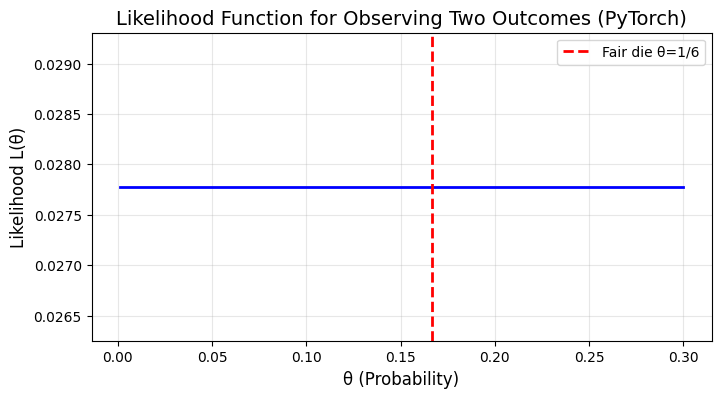

In [9]:
%matplotlib inline
import numpy as np
import torch
import matplotlib.pyplot as plt

# Observed data: rolled 2, then 4 on a fair die
observed_outcomes = torch.tensor([1, 3])  # 0-indexed

# Fair die probabilities
probs = torch.ones(6) / 6.0

categorical_dist = torch.distributions.Categorical(probs=probs)
log_likelihood = categorical_dist.log_prob(observed_outcomes).sum()
likelihood = torch.exp(log_likelihood)

print(f"Likelihood of observing (2,4) with fair die (theta=1/6): {likelihood.item():.6f}")
print(f"Expected value (manual): {1/36:.6f}")
print(f"Log-likelihood: {log_likelihood.item():.6f}")

# Compute likelihood for different theta values
theta_values = torch.linspace(0.001, 0.3, 300)
likelihoods = []
for theta in theta_values:
    probs_theta = torch.ones(6) * theta / (6 * theta)
    dist = torch.distributions.Categorical(probs=probs_theta)
    log_like = dist.log_prob(observed_outcomes).sum()
    likelihoods.append(torch.exp(log_like).item())
likelihoods = torch.tensor(likelihoods)

plt.figure(figsize=(8, 4))
plt.plot(theta_values.numpy(), likelihoods.numpy(), 'b-', linewidth=2)
plt.axvline(1/6, color='r', linestyle='--', linewidth=2, label=f'Fair die θ=1/6')
plt.xlabel('θ (Probability)', fontsize=12)
plt.ylabel('Likelihood L(θ)', fontsize=12)
plt.title('Likelihood Function for Observing Two Outcomes (PyTorch)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

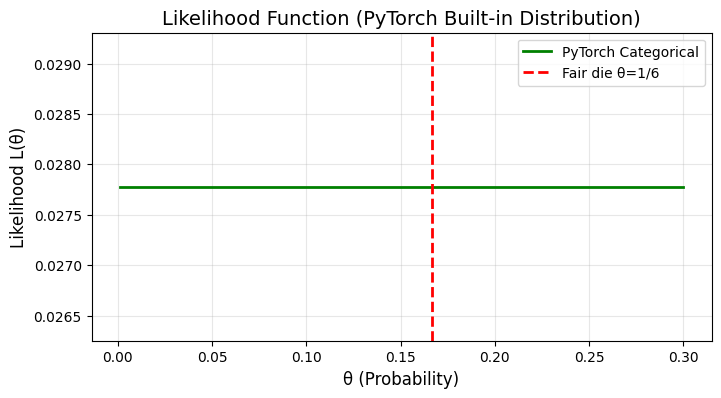

Likelihood at theta=1/6: 0.027778


In [10]:
import torch
import matplotlib.pyplot as plt

observed_outcomes = torch.tensor([1, 3])
theta_range = torch.linspace(0.001, 0.3, 300)

likelihoods = []
for theta in theta_range:
    probs = torch.ones(6) * theta
    probs = probs / probs.sum()
    
    dist = torch.distributions.Categorical(probs=probs)
    log_like = dist.log_prob(observed_outcomes).sum()
    likelihoods.append(torch.exp(log_like).item())

likelihoods = torch.tensor(likelihoods)

plt.figure(figsize=(8, 4))
plt.plot(theta_range.numpy(), likelihoods.numpy(), 'g-', linewidth=2, label='PyTorch Categorical')
plt.axvline(1/6, color='r', linestyle='--', linewidth=2, label='Fair die θ=1/6')
plt.xlabel('θ (Probability)', fontsize=12)
plt.ylabel('Likelihood L(θ)', fontsize=12)
plt.title('Likelihood Function (PyTorch Built-in Distribution)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# Verify at theta=1/6
probs_fair = torch.ones(6) / 6.0
dist_fair = torch.distributions.Categorical(probs=probs_fair)
log_like_fair = dist_fair.log_prob(observed_outcomes).sum()
likelihood_fair = torch.exp(log_like_fair)

print(f"Likelihood at theta=1/6: {likelihood_fair.item():.6f}")

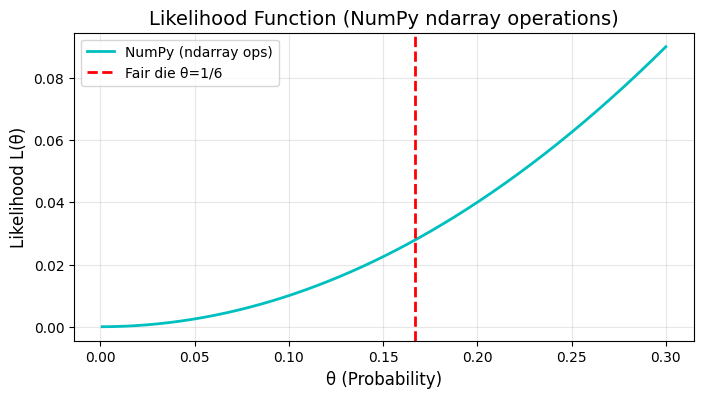

Likelihood at theta=1/6: 0.027778


In [11]:
import matplotlib.pyplot as plt
import numpy as np

observed_outcomes = [1, 3]
theta_range = np.linspace(0.001, 0.3, 300)

n_observations = len(observed_outcomes)
likelihood_np = np.power(theta_range, n_observations)

plt.figure(figsize=(8, 4))
plt.plot(theta_range, likelihood_np, 'c-', linewidth=2, label='NumPy (ndarray ops)')
plt.axvline(1/6, color='r', linestyle='--', linewidth=2, label='Fair die θ=1/6')
plt.xlabel('θ (Probability)', fontsize=12)
plt.ylabel('Likelihood L(θ)', fontsize=12)
plt.title('Likelihood Function (NumPy ndarray operations)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Likelihood at theta=1/6: {float(np.power(1/6, 2)):.6f}")


Likelihood of observing (2,4) with fair die (theta=1/6): 0.027778
Expected value (manual): 0.027778
Log-likelihood: -3.583519


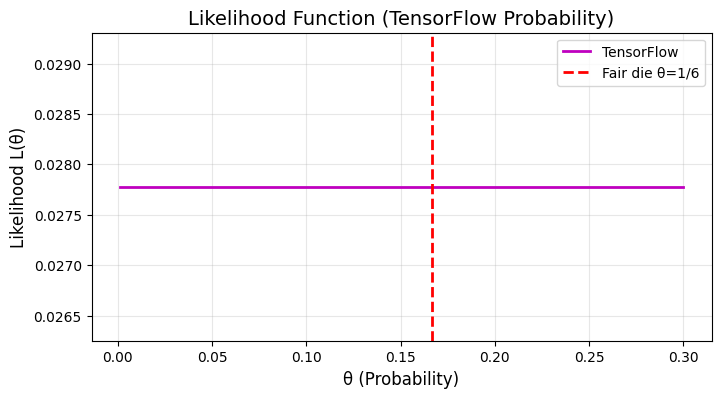

In [12]:
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt

observed_outcomes = tf.constant([1, 3])
probs = tf.ones(6) / 6.0

categorical_dist = tfp.distributions.Categorical(probs=probs)
log_likelihood = tf.reduce_sum(categorical_dist.log_prob(observed_outcomes))
likelihood = tf.exp(log_likelihood)

print(f"Likelihood of observing (2,4) with fair die (theta=1/6): {likelihood.numpy():.6f}")
print(f"Expected value (manual): {1/36:.6f}")
print(f"Log-likelihood: {log_likelihood.numpy():.6f}")

theta_tf = tf.linspace(0.001, 0.3, 300)

likelihoods_tf = []
for theta in theta_tf:
    probs_theta = tf.ones(6) * theta / (6 * theta)
    dist = tfp.distributions.Categorical(probs=probs_theta)
    log_like = tf.reduce_sum(dist.log_prob(observed_outcomes))
    likelihoods_tf.append(tf.exp(log_like).numpy())
likelihoods_tf = tf.constant(likelihoods_tf)

plt.figure(figsize=(8, 4))
plt.plot(theta_tf.numpy(), likelihoods_tf.numpy(), 'm-', linewidth=2, label='TensorFlow')
plt.axvline(1/6, color='r', linestyle='--', linewidth=2, label='Fair die θ=1/6')
plt.xlabel('θ (Probability)', fontsize=12)
plt.ylabel('Likelihood L(θ)', fontsize=12)
plt.title('Likelihood Function (TensorFlow Probability)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

## 2.2. Likelihood for Independent Observations

When data consists of independent observations $X = \{x_1, x_2, \ldots, x_n\}$, the likelihood function factorizes as:

$$
L(\theta) = P(X|\theta) = \prod_{i=1}^{n} P(x_i|\theta)
$$

### Detailed Explanation:

This formula applies when each observation is independent of the others. In practice, independence significantly simplifies calculations, converting complex joint probabilities into simple products of individual probabilities.

### Derivation:

Given the assumption of independence, by definition of joint probability:

* For independent events:

$$
P(x_1, x_2, \ldots, x_n|\theta) = P(x_1|\theta)P(x_2|\theta) \ldots P(x_n|\theta)
$$

Thus, the likelihood function for independent observations naturally becomes:

$$
L(\theta) = \prod_{i=1}^{n} P(x_i|\theta)
$$

### Concrete Example and Calculation:

Suppose we toss a coin 3 times with outcomes (Heads, Tails, Heads), and let $\theta = 0.5$ represent the probability of Heads:

* detailed calculation:

$$
L(0.5) = P(H|\theta = 0.5) \times P(T|\theta = 0.5) \times P(H|\theta = 0.5)
$$

$$
= (0.5) \times (0.5) \times (0.5) = 0.125
$$

### Python Verification:

In [13]:
import torch

outcomes = torch.tensor([1.0, 0.0, 1.0])
theta = 0.5

bernoulli_dist = torch.distributions.Bernoulli(probs=theta)
log_likelihood = bernoulli_dist.log_prob(outcomes).sum()
likelihood = torch.exp(log_likelihood)

print("Likelihood:", likelihood.item())
print("Expected:", 0.125)

Likelihood: 0.125
Expected: 0.125


## 2.3. Log-Likelihood Function

### Full Formula:

The log-likelihood function is defined as:

$$
l(\theta) = \log L(\theta) = \sum_{i=1}^{n} \log P(x_i|\theta)
$$

### Detailed Explanation:

* The log-likelihood converts the product of probabilities into a sum, simplifying computation.
* It also helps avoid numerical underflow that occurs when multiplying very small probabilities.

### Derivation:

**1.** Starting from likelihood function for independent observations:

$$
L(\theta) = \prod_{i=1}^{n} P(x_i|\theta)
$$

**2.** Taking natural log of both sides to convert product to summation:

$$
\log L(\theta) = \log\left(\prod_{i=1}^{n} P(x_i|\theta)\right)
$$

**3.** Applying the logarithm property:

$$
\log L(\theta) = \sum_{i=1}^{n} \log P(x_i|\theta)
$$

Thus, we have clearly derived the log-likelihood function.

### Concrete Example & Calculation:

**Example:** Consider flipping a fair coin 3 times, with outcomes: Heads (H), Tails (T), Heads (H). Assume $\theta = 0.5$:

* Compute likelihood first:

$$
L(0.5) = 0.5 \times 0.5 \times 0.5 = 0.125
$$

* Compute log-likelihood:

$$
l(0.5) = \log(0.5) + \log(0.5) + \log(0.5) = 3\log(0.5)
$$

* Using numerical approximation:

$$
3\log(0.5) = 3 \times (-0.6931) = -2.0794
$$

### Python Verification:


In [14]:
import numpy as np

log_likelihood = 3 * np.log(0.5)
print("Log-Likelihood:", log_likelihood)
# Output: Log-Likelihood: -2.0794


Log-Likelihood: -2.0794415416798357


## 2.4. Negative Log-Likelihood (NLL)

### Full Formula:

$$
NLL(\theta) = -\log L(\theta) = -\sum_{i=1}^{n} \log P(x_i|\theta)
$$

### Detailed Explanation:

The Negative Log-Likelihood is often used in practice because:

* Taking logs converts multiplication into summation (easier computation).
* Taking the negative allows minimization, which is more convenient numerically in optimization algorithms.

MLE thus becomes the minimization problem:

$$
\hat{\theta} = \arg\min_{\theta} NLL(\theta)
$$

### Derivation:

Start from the likelihood function for independent observations:

$$
L(\theta) = \prod_{i=1}^{n} P(x_i|\theta)
$$

Take the logarithm:

$$
\log L(\theta) = \log \prod_{i=1}^{n} P(x_i|\theta) = \sum_{i=1}^{n} \log P(x_i|\theta)
$$

Multiply by -1:

$$
NLL(\theta) = -\log L(\theta) = -\sum_{i=1}^{n} \log P(x_i|\theta)
$$

### Concrete Example and Detailed Calculation:

Consider tossing a biased coin 4 times, observing the results: H, H, T, H.

* Let's assume initially $\theta = 0.6$, probability of getting heads.

Likelihood:

$$
L(0.6) = 0.6 \times 0.6 \times 0.4 \times 0.6 = 0.0864
$$

Log-likelihood:

$$
\log L(0.6) = \log(0.6) + \log(0.6) + \log(0.4) + \log(0.6)
$$

Compute detailed (approx):

* $\log(0.6) \approx -0.5108, \log(0.4) \approx -0.9163$
* Thus:

$$
\log L(0.6) = (-0.5108) + (-0.5108) + (-0.9163) + (-0.5108) = -2.4487
$$

Negative log-likelihood (NLL):

$$
NLL(0.6) = -(-2.4487) = 2.4487
$$

### Python Verification:


In [15]:
import numpy as np

theta = 0.6
log_likelihood = 3*np.log(theta) + np.log(1-theta)
nll = -log_likelihood

print("Likelihood:", theta**3 * (1-theta))
print("Log-Likelihood:", log_likelihood)
print("Negative Log-Likelihood:", nll)


Likelihood: 0.08639999999999999
Log-Likelihood: -2.448767603172127
Negative Log-Likelihood: 2.448767603172127


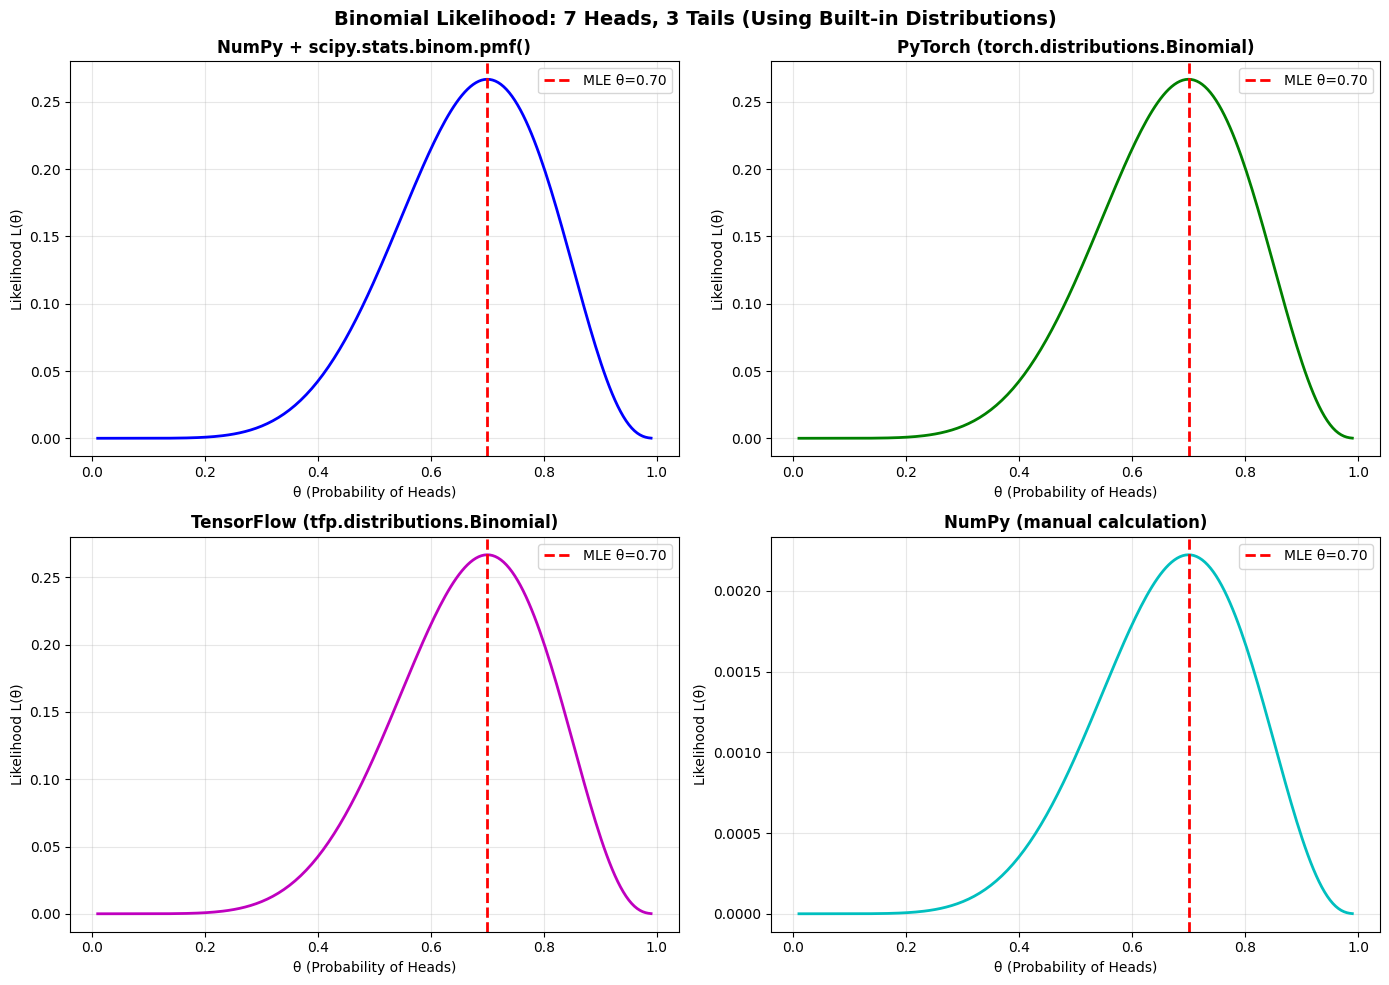


Binomial Distribution MLE Comparison
Observed: 7 Heads, 3 Tails
MLE theta = 7/10 = 0.7000

Using Built-in Distributions:
  - NumPy:      scipy.stats.binom.pmf()
  - PyTorch:    torch.distributions.Binomial
  - TensorFlow: tfp.distributions.Binomial
  - NumPy:      np.power() operations


In [16]:
import numpy as np
import torch
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from scipy.stats import binom

n_H, n_T = 7, 3
n_total = n_H + n_T
theta_range = np.linspace(0.01, 0.99, 200)

# NumPy (scipy)
likelihood_np = [binom.pmf(n_H, n_total, theta) for theta in theta_range]

# PyTorch
likelihood_torch = []
for theta in theta_range:
    binomial_dist = torch.distributions.Binomial(total_count=n_total, probs=theta)
    prob = torch.exp(binomial_dist.log_prob(torch.tensor(float(n_H))))
    likelihood_torch.append(prob.item())

# TensorFlow
likelihood_tf = []
for theta in theta_range:
    binomial_dist = tfp.distributions.Binomial(total_count=float(n_total), probs=theta)
    prob = tf.exp(binomial_dist.log_prob(float(n_H)))
    likelihood_tf.append(prob.numpy())

# NumPy (manual calculation)
likelihood_np_manual = np.power(theta_range, n_H) * np.power(1 - theta_range, n_T)

theta_mle = n_H / n_total

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0,0].plot(theta_range, likelihood_np, 'b-', linewidth=2)
axes[0,0].axvline(theta_mle, color='r', linestyle='--', linewidth=2, label=f'MLE θ={theta_mle:.2f}')
axes[0,0].set_title('NumPy + scipy.stats.binom.pmf()', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('θ (Probability of Heads)', fontsize=10)
axes[0,0].set_ylabel('Likelihood L(θ)', fontsize=10)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

axes[0,1].plot(theta_range, likelihood_torch, 'g-', linewidth=2)
axes[0,1].axvline(theta_mle, color='r', linestyle='--', linewidth=2, label=f'MLE θ={theta_mle:.2f}')
axes[0,1].set_title('PyTorch (torch.distributions.Binomial)', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('θ (Probability of Heads)', fontsize=10)
axes[0,1].set_ylabel('Likelihood L(θ)', fontsize=10)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

axes[1,0].plot(theta_range, likelihood_tf, 'm-', linewidth=2)
axes[1,0].axvline(theta_mle, color='r', linestyle='--', linewidth=2, label=f'MLE θ={theta_mle:.2f}')
axes[1,0].set_title('TensorFlow (tfp.distributions.Binomial)', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('θ (Probability of Heads)', fontsize=10)
axes[1,0].set_ylabel('Likelihood L(θ)', fontsize=10)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

axes[1,1].plot(theta_range, likelihood_np_manual, 'c-', linewidth=2)
axes[1,1].axvline(theta_mle, color='r', linestyle='--', linewidth=2, label=f'MLE θ={theta_mle:.2f}')
axes[1,1].set_title('NumPy (manual calculation)', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('θ (Probability of Heads)', fontsize=10)
axes[1,1].set_ylabel('Likelihood L(θ)', fontsize=10)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.suptitle(f'Binomial Likelihood: {n_H} Heads, {n_T} Tails (Using Built-in Distributions)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print(f"Binomial Distribution MLE Comparison")
print(f"{'='*70}")
print(f"Observed: {n_H} Heads, {n_T} Tails")
print(f"MLE theta = {n_H}/{n_H+n_T} = {theta_mle:.4f}")
print(f"\nUsing Built-in Distributions:")
print(f"  - NumPy:      scipy.stats.binom.pmf()")
print(f"  - PyTorch:    torch.distributions.Binomial")
print(f"  - TensorFlow: tfp.distributions.Binomial")  
print(f"  - NumPy:      np.power() operations")
print(f"{'='*70}")

## 2.5. Binomial Likelihood

### Full Formula:

Likelihood function for binomially distributed data [1][2] (success probability $\theta$, number of successes $n_H$, failures $n_T$):

$$
L(\theta) = \theta^{n_H}(1-\theta)^{n_T}
$$

### Detailed Explanation:

* This formula expresses the likelihood of observing exactly $n_H$ successes in $n_H + n_T$ independent Bernoulli trials.
* Commonly used when data represents counts of successes/failures.

### Derivation:

The binomial probability formula (excluding the combinatorial coefficient, as it doesn't affect maximization w.r.t. $\theta$) is:

$$
P(X|\theta) \propto \theta^{n_H}(1-\theta)^{n_T}
$$

Thus, the likelihood function is:

$$
L(\theta) = \theta^{n_H}(1-\theta)^{n_T}
$$

### Concrete Example & Calculation:

**Example:** Suppose a biased coin is flipped 10 times, yielding exactly 7 heads and 3 tails. Assume $\theta = 0.7$:

* Compute likelihood:

$$
L(0.7) = (0.7)^7 \times (0.3)^3
$$

* detailed numeric calculation:

$$
(0.7)^7 \approx 0.0823543, \quad (0.3)^3 = 0.027
$$

Thus:

$$
L(0.7) \approx 0.0823543 \times 0.027 = 0.00222357
$$

### Python Verification:


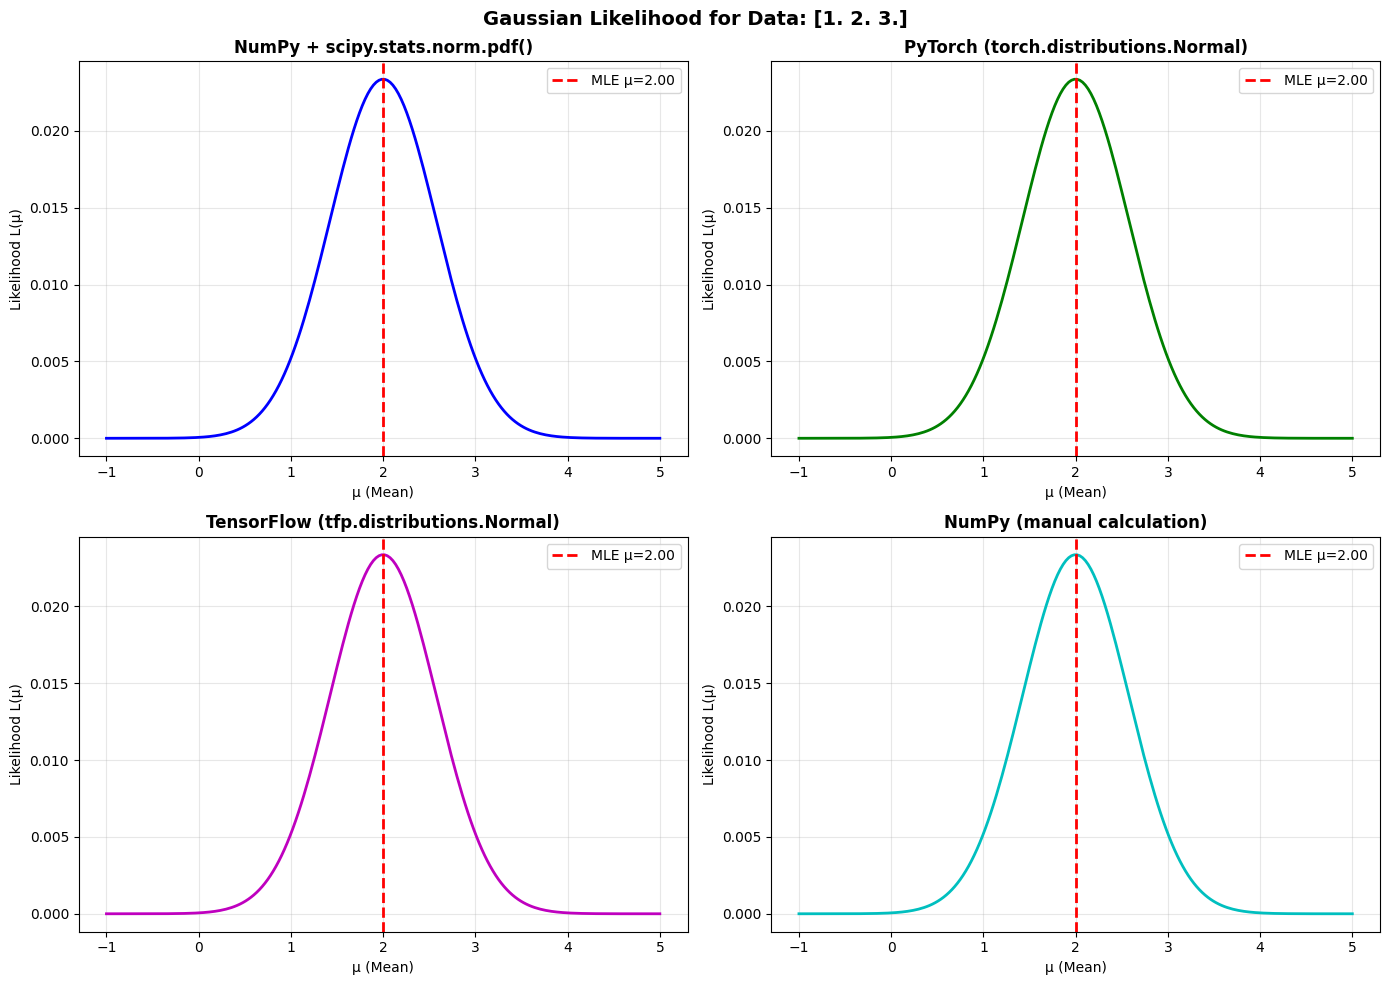


Gaussian Distribution MLE Comparison
Observed data: [1. 2. 3.]
True parameters: mu=2.0, sigma^2=1.0
MLE mu = 2.0000

Likelihood at true parameters (mu=2.0, sigma^2=1.0):
  NumPy + scipy:  0.023358
  PyTorch:        0.023358
  TensorFlow:     0.023358
  NumPy (manual): 0.023358

Using Built-in Distributions:
  - NumPy:      scipy.stats.norm.pdf()
  - PyTorch:    torch.distributions.Normal
  - TensorFlow: tfp.distributions.Normal


In [17]:
import numpy as np
import torch
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from scipy.stats import norm

mu_true = 2.0
sigma_sq_true = 1.0
sigma_true = np.sqrt(sigma_sq_true)
x_data = np.array([1.0, 2.0, 3.0])

# NumPy
likelihood_np = np.prod([norm.pdf(x, mu_true, sigma_true) for x in x_data])

# PyTorch
x_torch = torch.tensor(x_data)
normal_dist_torch = torch.distributions.Normal(mu_true, sigma_true)
log_likelihood_torch = normal_dist_torch.log_prob(x_torch).sum()
likelihood_torch = torch.exp(log_likelihood_torch)

# TensorFlow
x_tf = tf.constant(x_data)
normal_dist_tf = tfp.distributions.Normal(mu_true, sigma_true)
log_likelihood_tf = tf.reduce_sum(normal_dist_tf.log_prob(x_tf))
likelihood_tf = tf.exp(log_likelihood_tf)

# NumPy (manual calculation)
pdf_np = (1 / np.sqrt(2 * np.pi * sigma_sq_true)) * np.exp(-(x_data - mu_true)**2 / (2 * sigma_sq_true))
likelihood_np_manual = np.prod(pdf_np)

mu_range = np.linspace(-1, 5, 200)
likelihoods_np = [np.prod([norm.pdf(x, mu, sigma_true) for x in x_data]) for mu in mu_range]

likelihoods_torch = []
for mu in mu_range:
    dist = torch.distributions.Normal(mu, sigma_true)
    log_like = dist.log_prob(x_torch).sum()
    likelihoods_torch.append(torch.exp(log_like).item())

likelihoods_tf = []
for mu in mu_range:
    dist = tfp.distributions.Normal(mu, sigma_true)
    log_like = tf.reduce_sum(dist.log_prob(x_tf))
    likelihoods_tf.append(tf.exp(log_like).numpy())

likelihoods_np_manual = []
for mu in mu_range:
    pdf = (1 / np.sqrt(2 * np.pi * sigma_sq_true)) * np.exp(-(x_data - mu)**2 / (2 * sigma_sq_true))
    likelihoods_np_manual.append(float(np.prod(pdf)))

mu_mle = np.mean(x_data)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0,0].plot(mu_range, likelihoods_np, 'b-', linewidth=2)
axes[0,0].axvline(mu_mle, color='r', linestyle='--', linewidth=2, label=f'MLE μ={mu_mle:.2f}')
axes[0,0].set_title('NumPy + scipy.stats.norm.pdf()', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('μ (Mean)', fontsize=10)
axes[0,0].set_ylabel('Likelihood L(μ)', fontsize=10)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

axes[0,1].plot(mu_range, likelihoods_torch, 'g-', linewidth=2)
axes[0,1].axvline(mu_mle, color='r', linestyle='--', linewidth=2, label=f'MLE μ={mu_mle:.2f}')
axes[0,1].set_title('PyTorch (torch.distributions.Normal)', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('μ (Mean)', fontsize=10)
axes[0,1].set_ylabel('Likelihood L(μ)', fontsize=10)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

axes[1,0].plot(mu_range, likelihoods_tf, 'm-', linewidth=2)
axes[1,0].axvline(mu_mle, color='r', linestyle='--', linewidth=2, label=f'MLE μ={mu_mle:.2f}')
axes[1,0].set_title('TensorFlow (tfp.distributions.Normal)', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('μ (Mean)', fontsize=10)
axes[1,0].set_ylabel('Likelihood L(μ)', fontsize=10)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

axes[1,1].plot(mu_range, likelihoods_np_manual, 'c-', linewidth=2)
axes[1,1].axvline(mu_mle, color='r', linestyle='--', linewidth=2, label=f'MLE μ={mu_mle:.2f}')
axes[1,1].set_title('NumPy (manual calculation)', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('μ (Mean)', fontsize=10)
axes[1,1].set_ylabel('Likelihood L(μ)', fontsize=10)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.suptitle(f'Gaussian Likelihood for Data: {x_data}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print(f"Gaussian Distribution MLE Comparison")
print(f"{'='*70}")
print(f"Observed data: {x_data}")
print(f"True parameters: mu={mu_true}, sigma^2={sigma_sq_true}")
print(f"MLE mu = {mu_mle:.4f}")
print(f"\nLikelihood at true parameters (mu={mu_true}, sigma^2={sigma_sq_true}):")
print(f"  NumPy + scipy:  {likelihood_np:.6f}")
print(f"  PyTorch:        {likelihood_torch.item():.6f}")
print(f"  TensorFlow:     {likelihood_tf.numpy():.6f}")
print(f"  NumPy (manual): {float(likelihood_np_manual):.6f}")
print(f"\nUsing Built-in Distributions:")
print(f"  - NumPy:      scipy.stats.norm.pdf()")
print(f"  - PyTorch:    torch.distributions.Normal")
print(f"  - TensorFlow: tfp.distributions.Normal")
print(f"{'='*70}")

In [18]:
import torch

theta = 0.7
n_H = 7
n_T = 3
n_total = n_H + n_T

binomial_dist = torch.distributions.Binomial(total_count=n_total, probs=theta)
log_prob = binomial_dist.log_prob(torch.tensor(float(n_H)))
likelihood = torch.exp(log_prob)

print("Likelihood:", likelihood.item())
print("Expected:", theta**n_H * (1 - theta)**n_T)

Likelihood: 0.26682794094085693
Expected: 0.0022235661


## 2.6. Gaussian Likelihood (Continuous Variables)

### Full Formula:

Likelihood function for data drawn from a Gaussian (normal) distribution [1][2] with mean $\mu$ and variance $\sigma^2$:

$$
L(\mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

### Detailed Explanation:

* This formula arises naturally from the Gaussian probability density function (pdf):

$$
f(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

* If we assume each observation $x_i$ is independently drawn from a Gaussian distribution, the joint probability (likelihood) is the product of the individual probabilities.

### Derivation:

Given independent observations $X = \{x_1, x_2, \ldots, x_n\}$:

**1.** The joint probability (likelihood) is:

$$
L(\mu, \sigma^2) = \prod_{i=1}^{n} f(x_i|\mu, \sigma^2)
$$

**2.** Substitute the Gaussian pdf for each $f(x_i|\mu, \sigma^2)$:

$$
L(\mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

**3.** Simplifying further is usually done by taking logarithms (Log-Likelihood) to ease calculations, but the above formula clearly defines the likelihood function.

### Concrete Example and Calculation:

**Suppose:** we have 3 observations drawn from a Gaussian distribution with mean $\mu = 2$, and variance $\sigma^2 = 1$:

$$
X = \{1, 2, 3\}
$$

* Compute each probability density individually:

$$
f(1|2, 1) = \frac{1}{\sqrt{2\pi}} e^{-(1-2)^2/2} = \frac{1}{\sqrt{2\pi}} e^{-0.5} \approx 0.24197
$$

$$
f(2|2, 1) = \frac{1}{\sqrt{2\pi}} e^{-(2-2)^2/2} = \frac{1}{\sqrt{2\pi}} \approx 0.39894
$$

$$
f(3|2, 1) = \frac{1}{\sqrt{2\pi}} e^{-(3-2)^2/2} = \frac{1}{\sqrt{2\pi}} e^{-0.5} \approx 0.24197
$$

* Compute the likelihood (product):

$$
L(2, 1) = (0.24197) \times (0.39894) \times (0.24197) \approx 0.02336
$$

### Python Verification:


In [19]:
import numpy as np
from scipy.stats import norm

mu = 2
sigma = np.sqrt(1)
x = np.array([1, 2, 3])

likelihood = np.prod(norm.pdf(x, mu, sigma))

print("Gaussian Likelihood:", likelihood)

Gaussian Likelihood: 0.02335800330543158


## 2.7. Maximum Likelihood Estimator for Discrete Probability

### Full Formula:

For discrete outcomes, the Maximum Likelihood Estimator (MLE) of the probability $\theta_i$ of outcome $i$ is given by:

$$
\hat{\theta}_i = \frac{n_i}{N}
$$

* $n_i$ is the number of occurrences of outcome $i$.
* $N$ is the total number of observations.

### Detailed Explanation:

This formula expresses the intuitive notion that the best estimate of the probability of observing a particular discrete outcome $i$ is simply the proportion of times this outcome occurred in all observed data.

### Derivation:

Given a set of independent discrete observations with $k$ possible outcomes, the likelihood is a multinomial distribution (without the constant combinatorial factor):

$$
L(\theta_1, \ldots, \theta_k) \propto \prod_{i=1}^{k} \theta_i^{n_i}
$$

Under the constraint:

$$
\sum_{i=1}^{k} \theta_i = 1
$$

We find MLE by maximizing this likelihood subject to the constraint above:

* Using Lagrange multipliers, set up the Lagrangian:

$$
\mathcal{L}(\theta, \lambda) = \sum_{i=1}^{k} n_i \log(\theta_i) - \lambda\left(\sum_{i=1}^{k} \theta_i - 1\right)
$$

* Taking partial derivatives and setting equal to zero:

$$
\frac{\partial \mathcal{L}}{\partial \theta_i} = \frac{n_i}{\theta_i} - \lambda = 0 \quad \Rightarrow \quad \theta_i = \frac{n_i}{\lambda}
$$

* Summing over all outcomes $i$:

$$
\sum_{i=1}^{k} \theta_i = 1 \quad \Rightarrow \quad \sum_{i=1}^{k} \frac{n_i}{\lambda} = \frac{N}{\lambda} = 1 \quad \Rightarrow \quad \lambda = N
$$

* Substitute back:

$$
\hat{\theta}_i = \frac{n_i}{N}
$$

Thus, we've rigorously derived the MLE for discrete probabilities.

### Concrete Example & Calculation:

**Example:** Suppose we have a 6-sided dice rolled 20 times, resulting in the following frequencies:

| Face | Frequency ($n_i$) |
| --- | --- |
| 1    | 2                 |
| 2    | 5                 |
| 3    | 3                 |
| 4    | 4                 |
| 5    | 4                 |
| 6    | 2                 |

* Total $N = 20$

Calculate the MLE for face "2":

$$
\hat{\theta}_2 = \frac{n_2}{N} = \frac{5}{20} = 0.25
$$

### Python Verification:


In [20]:
import numpy as np

frequencies = np.array([2, 5, 3, 4, 4, 2])
N = np.sum(frequencies)
theta_estimates = frequencies / N

print("MLE estimates:", theta_estimates)
print("Sum of probabilities:", np.sum(theta_estimates))

MLE estimates: [0.1  0.25 0.15 0.2  0.2  0.1 ]
Sum of probabilities: 0.9999999999999999


## 2.8. Maximum Likelihood Estimator for Poisson Distribution

### Full Formula:

Given data $X = \{x_1, x_2, \ldots, x_n\}$ independently drawn from a Poisson distribution with parameter $\lambda$, the likelihood function is:

$$
L(\lambda) = \prod_{i=1}^{n} \frac{\lambda^{x_i} e^{-\lambda}}{x_i!}
$$

The Maximum Likelihood Estimator (MLE) of $\lambda$ is given by:

$$
\hat{\lambda} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

### Detailed Explanation:

* The Poisson distribution is frequently used to model count-based data [2][3] (number of events occurring in a fixed interval).
* The MLE intuitively corresponds to the average number of events observed, as the parameter $\lambda$ represents the expected number of events.

### Derivation:

**1. Write the Likelihood function** for the Poisson distribution clearly:

$$
L(\lambda) = \prod_{i=1}^{n} \frac{\lambda^{x_i} e^{-\lambda}}{x_i!}
$$

**2. Take the natural logarithm** to simplify calculations (log-likelihood):

$$
l(\lambda) = \log L(\lambda) = \log\left(\prod_{i=1}^{n} \frac{\lambda^{x_i} e^{-\lambda}}{x_i!}\right)
$$

$$
= \sum_{i=1}^{n} \log\left(\frac{\lambda^{x_i} e^{-\lambda}}{x_i!}\right)
$$

**3. Simplify further:**

$$
l(\lambda) = \sum_{i=1}^{n} [x_i \log(\lambda) - \lambda - \log(x_i!)]
$$

**4. To find the MLE, take the derivative** with respect to $\lambda$, set equal to zero, and solve for $\lambda$:

$$
\frac{d}{d\lambda} l(\lambda) = \sum_{i=1}^{n} \frac{x_i}{\lambda} - n = 0
$$

**5. Solve for $\lambda$:**

$$
\frac{1}{\lambda}\sum_{i=1}^{n} x_i - n = 0 \quad \Rightarrow \quad \hat{\lambda} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

Thus, the MLE for the Poisson distribution is derived clearly and rigorously.

### Concrete Example & Calculation:

**Example:** Suppose we have observed the number of accidents per day over a period of 5 days:

| Day | Number of Accidents ($x_i$) |
| --- | --- |
| 1   | 2                           |
| 2   | 4                           |
| 3   | 1                           |
| 4   | 3                           |
| 5   | 0                           |

Compute the MLE for $\lambda$:

* First, sum the observations:

$$
\sum_{i=1}^{5} x_i = 2 + 4 + 1 + 3 + 0 = 10
$$

* Then divide by the number of observations $n = 5$:

$$
\hat{\lambda} = \frac{10}{5} = 2
$$

Thus, the MLE for the Poisson parameter $\lambda$ is 2.

### Python Verification:


In [21]:
import numpy as np

data = np.array([2, 4, 1, 3, 0])
lambda_hat = np.mean(data)

print("MLE for Poisson lambda:", lambda_hat)

MLE for Poisson lambda: 2.0


## 2.9. Maximum Likelihood Estimator for Exponential Distribution

### Full Formula:

Given independent observations $X = \{x_1, x_2, \ldots, x_n\}$ drawn from an exponential distribution with parameter $\lambda$, the likelihood function is defined as:

$$
L(\lambda) = \prod_{i=1}^{n} \lambda e^{-\lambda x_i}, \quad x_i \geq 0, \lambda > 0
$$

The Maximum Likelihood Estimator (MLE) of $\lambda$ is given by:

$$
\hat{\lambda} = \frac{n}{\sum_{i=1}^{n} x_i}
$$

### Detailed Explanation:

* The exponential distribution models waiting times between events [2] (e.g., time until the next occurrence of an event).
* The MLE intuitively corresponds to the inverse of the mean waiting time observed, reflecting the average rate at which events occur.

### Derivation:

**1. Write the likelihood function clearly:**

Given exponential distribution pdf:

$$
f(x|\lambda) = \lambda e^{-\lambda x}, \quad x \geq 0
$$

Thus, for independent observations:

$$
L(\lambda) = \prod_{i=1}^{n} \lambda e^{-\lambda x_i} = \lambda^n e^{-\lambda \sum_{i=1}^{n} x_i}
$$

**2. Take the log-likelihood** to simplify the calculations:

$$
l(\lambda) = \log L(\lambda) = \log\left(\lambda^n e^{-\lambda \sum x_i}\right)
$$

Simplify further:

$$
l(\lambda) = n\log(\lambda) - \lambda\sum_{i=1}^{n} x_i
$$

**3. Differentiate the log-likelihood** w.r.t. $\lambda$ and set equal to zero to find maximum:

$$
\frac{d}{d\lambda} l(\lambda) = \frac{n}{\lambda} - \sum_{i=1}^{n} x_i = 0
$$

**4. Solve for $\lambda$:**

$$
\frac{n}{\lambda} - \sum_{i=1}^{n} x_i = 0 \quad \Rightarrow \quad \hat{\lambda} = \frac{n}{\sum_{i=1}^{n} x_i}
$$

Thus, we clearly derived the MLE for the exponential distribution.

### Concrete Example & Calculation:

**Example:** Suppose we have recorded waiting times (in minutes) for a customer to arrive at a store across 4 observations:

| Observation | Waiting Time $x_i$ |
| --- | --- |
| 1           | 2                   |
| 2           | 5                   |
| 3           | 1                   |
| 4           | 4                   |

Compute MLE for $\lambda$:

* First, sum the observations:

$$
\sum_{i=1}^{4} x_i = 2 + 5 + 1 + 4 = 12
$$

* Then divide the number of observations $n = 4$ by the sum:

$$
\hat{\lambda} = \frac{n}{\sum x_i} = \frac{4}{12} = \frac{1}{3} \approx 0.3333
$$

Thus, the MLE for the exponential parameter $\lambda$ is 0.3333.

### Python Verification:


In [22]:
import numpy as np

observations = np.array([2, 5, 1, 4])
n = len(observations)
sum_x = np.sum(observations)
lambda_hat = n / sum_x

print("MLE for Exponential lambda:", lambda_hat)
print("Computed as: n / sum(x) = {}/{} = {:.4f}".format(n, sum_x, lambda_hat))

MLE for Exponential lambda: 0.3333333333333333
Computed as: n / sum(x) = 4/12 = 0.3333


## 2.10. Maximum Likelihood Estimator for Mean of Gaussian Distribution with Known Variance

### Full Formula:

For independent observations $X = \{x_1, x_2, \ldots, x_n\}$ drawn from a Gaussian distribution with unknown mean $\mu$ and **known variance** $\sigma^2$, the likelihood function is:

$$
L(\mu) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

The Maximum Likelihood Estimator (MLE) of $\mu$ is:

$$
\hat{\mu} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

### Detailed Explanation:

* When the variance is known, the MLE for the Gaussian mean is simply the arithmetic average of the observed data.
* Intuitively, the best estimate for the center of the data is the observed mean.

### Derivation:

**1. Write the likelihood function clearly:**

For Gaussian observations with known variance $\sigma^2$:

$$
L(\mu) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

**2. Take the logarithm to simplify:**

$$
l(\mu) = \log L(\mu) = \sum_{i=1}^{n} \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) - \sum_{i=1}^{n} \frac{(x_i - \mu)^2}{2\sigma^2}
$$

The first term is constant (does not depend on $\mu$), thus the optimization problem becomes minimizing:

$$
-\frac{1}{2\sigma^2}\sum_{i=1}^{n} (x_i - \mu)^2
$$

**3. Differentiate the expression with respect to $\mu$, set equal to zero:**

$$
\frac{d}{d\mu}\left[-\frac{1}{2\sigma^2}\sum_{i=1}^{n} (x_i - \mu)^2\right] = -\frac{1}{2\sigma^2}\sum_{i=1}^{n} 2(x_i - \mu)(-1) = \frac{1}{\sigma^2}\sum_{i=1}^{n} (x_i - \mu) = 0
$$

**4. Solve for $\mu$:**

$$
\sum_{i=1}^{n} (x_i - \mu) = 0 \quad \Rightarrow \quad \sum_{i=1}^{n} x_i - n\mu = 0 \quad \Rightarrow \quad \hat{\mu} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

Thus, we derived clearly the MLE estimator for Gaussian mean with known variance.

### Concrete Example & Calculation:

**Example:** Assume we have 5 observations drawn from a Gaussian distribution with unknown mean $\mu$, known variance $\sigma^2 = 4$:

| Observation | $x_i$ |
| --- | --- |
| 1           | 10    |
| 2           | 14    |
| 3           | 9     |
| 4           | 11    |
| 5           | 16    |

Calculate the MLE for the mean $\mu$:

* First, sum all observations:

$$
\sum_{i=1}^{5} x_i = 10 + 14 + 9 + 11 + 16 = 60
$$

* Divide by the total number of observations $n = 5$:

$$
\hat{\mu} = \frac{60}{5} = 12
$$

Thus, the MLE for the mean is 12.

### Python Verification:


In [23]:
import numpy as np

observations = np.array([10, 14, 9, 11, 16])
mu_hat = np.mean(observations)

print("MLE for Gaussian mean (mu):", mu_hat)

MLE for Gaussian mean (mu): 12.0


## 2.11. Maximum Likelihood Estimator for Variance of Gaussian Distribution with Known Mean

### Full Formula:

Given independent observations $X = \{x_1, x_2, \ldots, x_n\}$ drawn from a Gaussian distribution with **known mean** $\mu$ and unknown variance $\sigma^2$, the likelihood function is defined as:

$$
L(\sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

The Maximum Likelihood Estimator (MLE) of the variance $\sigma^2$ is given by:

$$
\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^{n} (x_i - \mu)^2
$$

### Detailed Explanation:

* The MLE for variance with known mean represents the average squared deviation of observations from the known mean.
* It provides the best estimate for variability or dispersion of the observed data.

### Derivation:

**1. Start from likelihood function:**

For Gaussian distribution with known mean $\mu$:

$$
L(\sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

**2. Take the natural logarithm** to simplify (log-likelihood):

$$
l(\sigma^2) = \log L(\sigma^2) = \sum_{i=1}^{n} \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) - \sum_{i=1}^{n} \frac{(x_i - \mu)^2}{2\sigma^2}
$$

Simplify further:

$$
l(\sigma^2) = -\frac{n}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n} (x_i - \mu)^2
$$

**3. Differentiate log-likelihood** w.r.t. $\sigma^2$ and set equal to zero:

$$
\frac{d}{d\sigma^2} l(\sigma^2) = -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2}\sum_{i=1}^{n} (x_i - \mu)^2 = 0
$$

**4. Solve clearly for $\sigma^2$:**

$$
-\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2}\sum_{i=1}^{n} (x_i - \mu)^2 = 0
$$

Multiply both sides by $2(\sigma^2)^2$:

$$
-n\sigma^2 + \sum_{i=1}^{n} (x_i - \mu)^2 = 0
$$

Thus, we obtain:

$$
\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^{n} (x_i - \mu)^2
$$

### Concrete Example & Calculation:

**Example:** Suppose we have observed data with a known mean $\mu = 10$, and recorded 4 observations:

| Observation | $x_i$ |
| --- | --- |
| 1           | 8     |
| 2           | 9     |
| 3           | 11    |
| 4           | 12    |

Compute the MLE for $\sigma^2$:

* Compute squared deviations from the known mean $\mu = 10$:

$$
(8 - 10)^2 = 4, \quad (9 - 10)^2 = 1, \quad (11 - 10)^2 = 1, \quad (12 - 10)^2 = 4
$$

* Sum these squared deviations:

$$
4 + 1 + 1 + 4 = 10
$$

* Divide by the number of observations ($n = 4$):

$$
\hat{\sigma}^2 = \frac{10}{4} = 2.5
$$

Thus, the MLE for the variance is 2.5.

### Python Verification:


In [24]:
import numpy as np

observations = np.array([8, 9, 11, 12])
mu_known = 10

sigma_sq_hat = np.mean((observations - mu_known)**2)

print("MLE for Gaussian variance (sigma^2):", sigma_sq_hat)

MLE for Gaussian variance (sigma^2): 2.5


## 2.12. Maximum Likelihood Estimator for Mean of Gaussian Distribution with Unknown Variance

### Full Formula:

Given independent observations $X = \{x_1, x_2, \ldots, x_n\}$ from a Gaussian (normal) distribution with unknown mean $\mu$ and unknown variance $\sigma^2$, the joint likelihood function is:

$$
L(\mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

The Maximum Likelihood Estimator (MLE) for the mean $\mu$ (with unknown variance) is given by:

$$
\hat{\mu} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

(This estimator is identical to the known-variance scenario for the mean.)

### Detailed Explanation:

* Even when variance is unknown, the MLE for the mean remains the arithmetic average of the observations.
* The unknown variance does not affect the MLE for the mean, as the mean and variance estimates are independent in a Gaussian distribution.

### Derivation:

**1. Write clearly the joint likelihood function:**

$$
L(\mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

**2. Take natural logarithm** to simplify (log-likelihood):

$$
l(\mu, \sigma^2) = \log L(\mu, \sigma^2) = -\frac{n}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n} (x_i - \mu)^2
$$

**3. Differentiate log-likelihood with respect to $\mu$**, set equal to zero:

$$
\frac{\partial}{\partial \mu} l(\mu, \sigma^2) = -\frac{1}{2\sigma^2}\sum_{i=1}^{n} 2(x_i - \mu)(-1) = \frac{1}{\sigma^2}\sum_{i=1}^{n} (x_i - \mu) = 0
$$

**4. Solve clearly for $\mu$:**

$$
\sum_{i=1}^{n} (x_i - \mu) = 0 \quad \Rightarrow \quad \sum_{i=1}^{n} x_i - n\mu = 0 \quad \Rightarrow \quad \hat{\mu} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

Thus, we explicitly derived the MLE for the mean in the unknown-variance scenario.

### Concrete Example & Calculation:

**Example:** Suppose we have recorded heights (in cm) of 4 individuals:

| Observation | $x_i$ |
| --- | --- |
| 1           | 165   |
| 2           | 170   |
| 3           | 175   |
| 4           | 160   |

Compute the MLE for the mean $\mu$:

* First, sum all observations:

$$
165 + 170 + 175 + 160 = 670
$$

* Then divide by number of observations $n = 4$:

$$
\hat{\mu} = \frac{670}{4} = 167.5
$$

Thus, the MLE estimate for the mean height is 167.5 cm.

### Python Verification:


In [25]:
import numpy as np

observations = np.array([165, 170, 175, 160])
mu_hat = np.mean(observations)

print("MLE for Gaussian mean (mu):", mu_hat)

MLE for Gaussian mean (mu): 167.5


## 2.13. Maximum Likelihood Estimator for Variance of Gaussian Distribution with Unknown Mean

### Full Formula:

Given independent observations $X = \{x_1, x_2, \ldots, x_n\}$ drawn from a Gaussian (normal) distribution with unknown mean $\mu$ and unknown variance $\sigma^2$, the joint likelihood function is:

$$
L(\mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

The Maximum Likelihood Estimator (MLE) for the variance $\sigma^2$ with unknown mean is:

$$
\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^{n} (x_i - \hat{\mu})^2, \quad \text{where } \hat{\mu} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

### Detailed Explanation:

* The MLE of variance when the mean is also unknown is computed using the sample mean $\hat{\mu}$, and it represents the average squared deviations from this estimated mean.
* This provides the best statistical estimate of data variability around the observed mean.

### Derivation:

**1. Clearly write down the joint likelihood function:**

$$
L(\mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

**2. Take the natural logarithm** (log-likelihood) to simplify calculations:

$$
l(\mu, \sigma^2) = \log L(\mu, \sigma^2) = -\frac{n}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n} (x_i - \mu)^2
$$

**3. First, find the estimator for the mean $\mu$** (as done previously):

$$
\hat{\mu} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

**4. Substitute this $\hat{\mu}$ into the log-likelihood and differentiate with respect to $\sigma^2$:**

$$
\frac{\partial}{\partial \sigma^2} l(\mu, \sigma^2) = -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2}\sum_{i=1}^{n} (x_i - \hat{\mu})^2 = 0
$$

**5. Solve explicitly for $\sigma^2$:**

Multiply by $2(\sigma^2)^2$:

$$
-n\sigma^2 + \sum_{i=1}^{n} (x_i - \hat{\mu})^2 = 0
$$

Thus, the estimator is explicitly obtained:

$$
\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^{n} (x_i - \hat{\mu})^2
$$

### Concrete Example & Calculation:

**Example:** Suppose we have observed the exam scores of 5 students (out of 100):

| Student | Score ($x_i$) |
| --- | --- |
| 1       | 75            |
| 2       | 80            |
| 3       | 85            |
| 4       | 70            |
| 5       | 90            |

* First, calculate sample mean $\hat{\mu}$:

$$
\hat{\mu} = \frac{75 + 80 + 85 + 70 + 90}{5} = \frac{400}{5} = 80
$$

* Then, calculate squared deviations from this mean:

$$
(75 - 80)^2 = 25, \quad (80 - 80)^2 = 0, \quad (85 - 80)^2 = 25, \quad (70 - 80)^2 = 100, \quad (90 - 80)^2 = 100
$$

* Sum these squared deviations:

$$
25 + 0 + 25 + 100 + 100 = 250
$$

* Finally, compute variance MLE ($\hat{\sigma}^2$):

$$
\hat{\sigma}^2 = \frac{250}{5} = 50
$$

Thus, the MLE for variance is 50.

### Python Verification:


In [26]:
import numpy as np

scores = np.array([75, 80, 85, 70, 90])
mu_hat = np.mean(scores)
sigma_sq_hat = np.var(scores, ddof=0)
sigma_sq_hat_manual = np.mean((scores - mu_hat)**2)

print("MLE for Gaussian variance (sigma^2):", sigma_sq_hat)
print("Manual calculation:", sigma_sq_hat_manual)

MLE for Gaussian variance (sigma^2): 50.0
Manual calculation: 50.0


## 2.14. Maximum Likelihood Estimator for Bernoulli Distribution

### Full Formula:

Given independent Bernoulli trials (e.g., coin flips) with outcomes $X = \{x_1, x_2, \ldots, x_n\}$, where each $x_i \in \{0, 1\}$ and parameter $\theta$ is the probability of success ($x_i = 1$), the likelihood function is:

$$
L(\theta) = \prod_{i=1}^{n} \theta^{x_i}(1-\theta)^{1-x_i}
$$

The Maximum Likelihood Estimator (MLE) for the parameter $\theta$ is:

$$
\hat{\theta} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

### Detailed Explanation:

* The MLE for a Bernoulli parameter intuitively corresponds to the proportion of successes observed in the trials.
* This estimator is a straightforward and intuitive measure of the likelihood of success.

### Derivation:

**1. Clearly write down the likelihood function** for Bernoulli distribution:

$$
L(\theta) = \prod_{i=1}^{n} \theta^{x_i}(1-\theta)^{1-x_i}
$$

**2. Convert to log-likelihood** for easier differentiation:

$$
l(\theta) = \log L(\theta) = \sum_{i=1}^{n} [x_i \log(\theta) + (1-x_i) \log(1-\theta)]
$$

**3. Differentiate the log-likelihood** w.r.t. $\theta$ and set equal to zero to maximize:

$$
\frac{d}{d\theta} l(\theta) = \sum_{i=1}^{n} \frac{x_i}{\theta} - \sum_{i=1}^{n} \frac{1-x_i}{1-\theta} = 0
$$

**4. Solve explicitly for $\theta$:**

$$
\frac{\sum_{i=1}^{n} x_i}{\theta} = \frac{\sum_{i=1}^{n} (1-x_i)}{1-\theta}
$$

Cross multiply:

$$
(1-\theta)\sum_{i=1}^{n} x_i = \theta \sum_{i=1}^{n} (1-x_i)
$$

Simplify the right-hand side:

$$
\sum_{i=1}^{n} x_i - \theta \sum_{i=1}^{n} x_i = \theta(n - \sum_{i=1}^{n} x_i)
$$

Rearrange terms clearly:

$$
\sum_{i=1}^{n} x_i = \theta n \quad \Rightarrow \quad \hat{\theta} = \frac{\sum_{i=1}^{n} x_i}{n}
$$

Thus, we've explicitly derived the MLE estimator for a Bernoulli distribution.

### Concrete Example & Calculation:

**Example:** Suppose we flip a coin 8 times, getting the following results (1 = Heads, 0 = Tails):

| Flip | Outcome ($x_i$) |
| --- | --- |
| 1    | 1               |
| 2    | 0               |
| 3    | 1               |
| 4    | 1               |
| 5    | 0               |
| 6    | 1               |
| 7    | 0               |
| 8    | 1               |

Calculate the MLE for the probability of Heads ($\theta$):

* Sum of successes:

$$
1 + 0 + 1 + 1 + 0 + 1 + 0 + 1 = 5
$$

* Divide by total number of flips $n = 8$:

$$
\hat{\theta} = \frac{5}{8} = 0.625
$$

Thus, the MLE for the Bernoulli parameter is 0.625.

### Python Verification:


In [27]:
import numpy as np

outcomes = np.array([1, 0, 1, 1, 0, 1, 0, 1])
theta_hat = np.mean(outcomes)

print("MLE for Bernoulli theta:", theta_hat)

MLE for Bernoulli theta: 0.625


## 2.15. Maximum Likelihood Estimator for Multinomial Distribution

### Full Formula:

Given observations from a multinomial distribution with $k$ possible outcomes and parameters $\theta = \{\theta_1, \theta_2, \ldots, \theta_k\}$, where each outcome $i$ has probability $\theta_i$, the likelihood function is:

$$
L(\theta) = \frac{n!}{n_1!n_2!\ldots n_k!} \theta_1^{n_1}\theta_2^{n_2}\ldots\theta_k^{n_k}, \quad \text{where} \quad \sum_{i=1}^{k} \theta_i = 1
$$

The Maximum Likelihood Estimator (MLE) for each parameter $\theta_i$ is:

$$
\hat{\theta}_i = \frac{n_i}{n}, \quad \text{where} \quad n = \sum_{i=1}^{k} n_i
$$

### Detailed Explanation:

* The multinomial distribution generalizes the binomial distribution to cases where each trial has more than two possible outcomes.
* The MLE estimator for each probability is simply the proportion of times each outcome was observed.

### Derivation:

**1. Clearly write down the multinomial likelihood function:**

Given multinomial outcomes with counts $n_1, n_2, \ldots, n_k$:

$$
L(\theta) = \frac{n!}{n_1!n_2!\ldots n_k!} \theta_1^{n_1}\theta_2^{n_2}\ldots\theta_k^{n_k}
$$

**2. Convert to log-likelihood** for simpler differentiation (constants removed as they don't affect the optimization):

$$
l(\theta) = \sum_{i=1}^{k} n_i \log(\theta_i)
$$

**3. To account for the constraint** $\sum_{i=1}^{k} \theta_i = 1$, introduce a Lagrange multiplier $\lambda$ and form the Lagrangian clearly:

$$
\mathcal{L}(\theta, \lambda) = \sum_{i=1}^{k} n_i \log(\theta_i) - \lambda\left(\sum_{i=1}^{k} \theta_i - 1\right)
$$

**4. Differentiate w.r.t. each $\theta_i$** and set equal to zero:

$$
\frac{\partial \mathcal{L}}{\partial \theta_i} = \frac{n_i}{\theta_i} - \lambda = 0 \quad \Rightarrow \quad \theta_i = \frac{n_i}{\lambda}
$$

**5. Using the constraint** $\sum_{i=1}^{k} \theta_i = 1$, find $\lambda$:

$$
\sum_{i=1}^{k} \theta_i = 1 \quad \Rightarrow \quad \sum_{i=1}^{k} \frac{n_i}{\lambda} = \frac{n}{\lambda} = 1 \quad \Rightarrow \quad \lambda = n
$$

**6. Substitute back** to get MLE clearly:

$$
\hat{\theta}_i = \frac{n_i}{n}
$$

Thus, explicitly derived the MLE estimators for the multinomial distribution.

### Concrete Example & Calculation:

**Example:** Suppose we survey 50 people on their favorite fruits, obtaining the following responses:

| Fruit  | Count ($n_i$) |
| --- | --- |
| Apple  | 15            |
| Banana | 10            |
| Orange | 20            |
| Grape  | 5             |

Calculate the MLE estimates for each fruit category:

* Total count $n = 15 + 10 + 20 + 5 = 50$

Then clearly calculate proportions:

$$
\hat{\theta}_\text{Apple} = \frac{15}{50} = 0.3
$$

$$
\hat{\theta}_\text{Banana} = \frac{10}{50} = 0.2
$$

$$
\hat{\theta}_\text{Orange} = \frac{20}{50} = 0.4
$$

$$
\hat{\theta}_\text{Grape} = \frac{5}{50} = 0.1
$$

Thus, we clearly calculated the MLE probabilities for each outcome.

### Python Verification:


In [28]:
import numpy as np

counts = np.array([15, 10, 20, 5])
n_total = np.sum(counts)
theta_hat = counts / n_total

fruits = ["Apple", "Banana", "Orange", "Grape"]
for fruit, theta in zip(fruits, theta_hat):
    print(f"MLE for {fruit}: {theta:.2f}")
print(f"\nSum of probabilities: {np.sum(theta_hat):.2f}")

MLE for Apple: 0.30
MLE for Banana: 0.20
MLE for Orange: 0.40
MLE for Grape: 0.10

Sum of probabilities: 1.00


## 2.16. Maximum Likelihood Estimator for Uniform Distribution

### Full Formula:

Given independent observations $X = \{x_1, x_2, \ldots, x_n\}$ drawn from a uniform distribution defined over the interval $[0, \theta]$, where $0 \leq x_i \leq \theta$, the likelihood function is:

$$
L(\theta) = \begin{cases}
\frac{1}{\theta^n}, & \text{if } 0 \leq x_i \leq \theta \text{ for all } i \\
0, & \text{otherwise}
\end{cases}
$$

The Maximum Likelihood Estimator (MLE) for the parameter $\theta$ is:

$$
\hat{\theta} = \max\{x_1, x_2, \ldots, x_n\}
$$

### Detailed Explanation:

* The MLE for the uniform distribution intuitively corresponds to the largest observed value.
* This makes sense because the likelihood of observing all data is maximized when the interval just barely covers all observed data points, making it as small as possible but still valid.

### Derivation:

**1. Clearly define the likelihood function:**

$$
L(\theta) = \begin{cases}
\frac{1}{\theta^n}, & 0 \leq x_i \leq \theta \quad \forall i \\
0, & \text{otherwise}
\end{cases}
$$

**2. For the likelihood to be non-zero**, the parameter $\theta$ must be at least as large as the maximum observed value, $x_{(n)} = \max(x_1, x_2, \ldots, x_n)$.

**3. Given this constraint, clearly rewrite the likelihood function as:**

$$
L(\theta) = \frac{1}{\theta^n}, \quad \theta \geq x_{(n)}
$$

**4. To maximize $L(\theta)$, minimize the denominator** ($\theta^n$), meaning choosing the smallest possible $\theta$ that satisfies the constraint. Thus:

$$
\hat{\theta} = x_{(n)} = \max(x_1, x_2, \ldots, x_n)
$$

We clearly derived the MLE estimator for the uniform distribution.

### Concrete Example & Calculation:

**Example:** Suppose we have measured lengths (in cm) of 5 randomly selected metal rods produced in a factory, known to follow a uniform distribution over $[0, \theta]$:

| Rod | Length ($x_i$) |
| --- | --- |
| 1   | 10             |
| 2   | 12             |
| 3   | 8              |
| 4   | 9              |
| 5   | 11             |

* Determine the maximum length observed:

$$
\hat{\theta} = \max\{10, 12, 8, 9, 11\} = 12
$$

Thus, the MLE estimate for $\theta$ is clearly 12 cm.

### Python Verification:


In [29]:
import numpy as np

measurements = np.array([10, 12, 8, 9, 11])
theta_hat = np.max(measurements)

print("MLE for Uniform distribution (theta):", theta_hat)

MLE for Uniform distribution (theta): 12


## 2.17. Maximum Likelihood Estimator for Geometric Distribution

### Full Formula:

Given independent observations $X = \{x_1, x_2, \ldots, x_n\}$, each following a geometric distribution with parameter $\theta$ (probability of success), the likelihood function is:

$$
L(\theta) = \prod_{i=1}^{n} (1-\theta)^{x_i-1}\theta, \quad 0 < \theta \leq 1
$$

The Maximum Likelihood Estimator (MLE) for parameter $\theta$ is:

$$
\hat{\theta} = \frac{n}{\sum_{i=1}^{n} x_i}
$$

### Detailed Explanation:

* The geometric distribution describes the number of trials until the first success.
* The MLE intuitively corresponds to the reciprocal of the average number of trials needed for success.

### Derivation:

**1. Clearly define the geometric likelihood function:**

$$
L(\theta) = \prod_{i=1}^{n} (1-\theta)^{x_i-1}\theta
$$

**2. Take the natural logarithm** (log-likelihood) for easier computation:

$$
l(\theta) = \log L(\theta) = \sum_{i=1}^{n} [(x_i - 1) \log(1-\theta) + \log(\theta)]
$$

**3. Differentiate the log-likelihood** with respect to $\theta$, set equal to zero for maximization:

$$
\frac{d}{d\theta} l(\theta) = \sum_{i=1}^{n} \frac{-(x_i - 1)}{1-\theta} + \frac{n}{\theta} = 0
$$

**4. Solve explicitly for $\theta$:**

$$
\frac{n}{\theta} = \frac{\sum_{i=1}^{n} (x_i - 1)}{1-\theta}
$$

Cross-multiply and simplify:

$$
n(1-\theta) = \theta\sum_{i=1}^{n} (x_i - 1)
$$

Expanding:

$$
n - n\theta = \theta\sum_{i=1}^{n} x_i - n\theta
$$

Simplify (subtracting $-n\theta$ on both sides):

$$
n = \theta\sum_{i=1}^{n} x_i
$$

Thus, clearly obtaining the MLE estimator:

$$
\hat{\theta} = \frac{n}{\sum_{i=1}^{n} x_i}
$$

### Concrete Example & Calculation:

**Example:** Suppose we perform an experiment repeatedly and observe the following numbers of trials until the first success occurs:

| Observation | Trials until Success ($x_i$) |
| --- | --- |
| 1           | 3                            |
| 2           | 4                            |
| 3           | 2                            |
| 4           | 5                            |
| 5           | 1                            |

* Sum these observations:

$$
3 + 4 + 2 + 5 + 1 = 15
$$

* Calculate MLE clearly:

$$
\hat{\theta} = \frac{n}{\sum_{i=1}^{n} x_i} = \frac{5}{15} = \frac{1}{3} \approx 0.3333
$$

Thus, the MLE for the geometric parameter $\theta$ is 0.3333.

### Python Verification:


In [30]:
import numpy as np

trials = np.array([3, 4, 2, 5, 1])
n = len(trials)
sum_trials = np.sum(trials)
theta_hat = n / sum_trials

print("MLE for Geometric theta:", theta_hat)
print("Computed as: n / sum(trials) = {}/{} = {:.4f}".format(n, sum_trials, theta_hat))

MLE for Geometric theta: 0.3333333333333333
Computed as: n / sum(trials) = 5/15 = 0.3333


## 2.18. Maximum Likelihood Estimator for Negative Binomial Distribution

### Full Formula:

Given independent observations $X = \{x_1, x_2, \ldots, x_n\}$ from a negative binomial distribution, defined as the number of failures ($x_i$) until $r$ successes are reached, with success probability $\theta$, the likelihood function is:

$$
L(\theta) = \prod_{i=1}^{n} \binom{x_i + r - 1}{x_i} (1-\theta)^{x_i}\theta^r
$$

The Maximum Likelihood Estimator (MLE) for parameter $\theta$ (probability of success) is:

$$
\hat{\theta} = \frac{nr}{nr + \sum_{i=1}^{n} x_i}
$$

### Detailed Explanation:

* The negative binomial distribution models the number of failures before a fixed number of successes ($r$) occurs.
* The MLE estimator intuitively represents the proportion of successes relative to the total number of trials (successes + failures).

### Derivation:

**1. Clearly define the negative binomial likelihood function:**

Given independent observations:

$$
L(\theta) = \prod_{i=1}^{n} \binom{x_i + r - 1}{x_i} (1-\theta)^{x_i}\theta^r
$$

**2. Take natural logarithm** to simplify (ignoring constant binomial coefficients as they don't affect maximization w.r.t $\theta$):

$$
l(\theta) = \log L(\theta) = \sum_{i=1}^{n} [x_i \log(1-\theta) + r \log(\theta)] + (\text{constant terms})
$$

**3. Differentiate log-likelihood clearly** w.r.t. $\theta$, set equal to zero to maximize:

$$
\frac{d}{d\theta} l(\theta) = \sum_{i=1}^{n} \frac{-x_i}{1-\theta} + \frac{nr}{\theta} = 0
$$

**4. Solve explicitly for $\theta$:**

$$
\frac{nr}{\theta} = \frac{\sum_{i=1}^{n} x_i}{1-\theta}
$$

Cross multiply to solve:

$$
nr(1-\theta) = \theta\sum_{i=1}^{n} x_i
$$

Expand clearly:

$$
nr - nr\theta = \theta\sum_{i=1}^{n} x_i
$$

Collect terms with $\theta$:

$$
nr = \theta\sum_{i=1}^{n} x_i + nr\theta
$$

Factor $\theta$ clearly:

$$
nr = \theta\left(\sum_{i=1}^{n} x_i + nr\right)
$$

Solve explicitly for $\theta$:

$$
\hat{\theta} = \frac{nr}{nr + \sum_{i=1}^{n} x_i}
$$

Thus, explicitly derived the MLE for negative binomial distribution.

### Concrete Example & Calculation:

**Example:** Suppose we observe the number of failed attempts to make exactly $r = 2$ successful shots in basketball across 4 trials:

| Trial | Failures until 2 successes ($x_i$) |
| --- | --- |
| 1     | 3                                   |
| 2     | 2                                   |
| 3     | 4                                   |
| 4     | 1                                   |

* First, calculate the total number of failures:

$$
3 + 2 + 4 + 1 = 10
$$

* Compute clearly MLE for $\theta$:

$$
\hat{\theta} = \frac{nr}{nr + \sum_{i=1}^{n} x_i} = \frac{4 \times 2}{(4 \times 2) + 10} = \frac{8}{18} = 0.4444
$$

Thus, the MLE for the success probability $\theta$ is 0.4444.

### Python Verification:


In [31]:
import numpy as np

x_i = np.array([3, 2, 4, 1])
r = 2
n = len(x_i)
sum_x = np.sum(x_i)

theta_hat = (n * r) / (n * r + sum_x)

print("MLE for Negative Binomial theta:", theta_hat)
print("Computed as: (n*r) / (n*r + sum(x_i)) = ({0}*{1}) / ({0}*{1} + {2}) = {3:.4f}".format(n, r, sum_x, theta_hat))

MLE for Negative Binomial theta: 0.4444444444444444
Computed as: (n*r) / (n*r + sum(x_i)) = (4*2) / (4*2 + 10) = 0.4444


## 3. Exercise Solutions

This section provides detailed solutions to all exercises from Section 22.7 of the D2L textbook [1], including:
- **Detailed reasoning:** Clear mathematical derivations
- **Computations:** All calculation steps shown explicitly
- **Python implementation:** Numerical verification of analytical results

### 3.1. Exercise 1

**Problem:**

Given a probability density function (PDF):

$$
p(x|\alpha) = \alpha e^{-\alpha x}, \quad x \geq 0, \alpha > 0
$$

We have a single observed data point $x = 3$.

Find the Maximum Likelihood Estimator (MLE) for the parameter $\alpha$.


### Solution:

**Step 1: Write the Likelihood Function Clearly**

Since we have only one observation $x = 3$:

$$
L(\alpha) = p(3|\alpha) = \alpha e^{-3\alpha}
$$

**Step 2: Convert to Log-Likelihood**

Take the natural logarithm to simplify calculations:

$$
l(\alpha) = \log(\alpha e^{-3\alpha}) = \log(\alpha) + \log(e^{-3\alpha})
$$

Simplify clearly:

$$
l(\alpha) = \log(\alpha) - 3\alpha
$$

**Step 3: Differentiate and Set to Zero to Maximize**

Differentiate $l(\alpha)$ with respect to $\alpha$:

$$
\frac{d}{d\alpha}l(\alpha) = \frac{1}{\alpha} - 3
$$

Set this derivative equal to zero to find the maximum clearly:

$$
\frac{1}{\alpha} - 3 = 0
$$

**Step 4: Solve explicitly for α**

Solve the equation detailed:

$$
\frac{1}{\alpha} - 3 = 0 \quad \Rightarrow \quad \frac{1}{\alpha} = 3 \quad \Rightarrow \quad \hat{\alpha} = \frac{1}{3}
$$

Thus, clearly we have obtained the MLE:

$$
\hat{\alpha} = \frac{1}{3}
$$

**Interpretation:** For an exponential distribution, the MLE for the rate parameter $\alpha$ is the reciprocal of the observed value. This makes intuitive sense: if we observe $x=3$, we estimate the average rate as $1/3$.

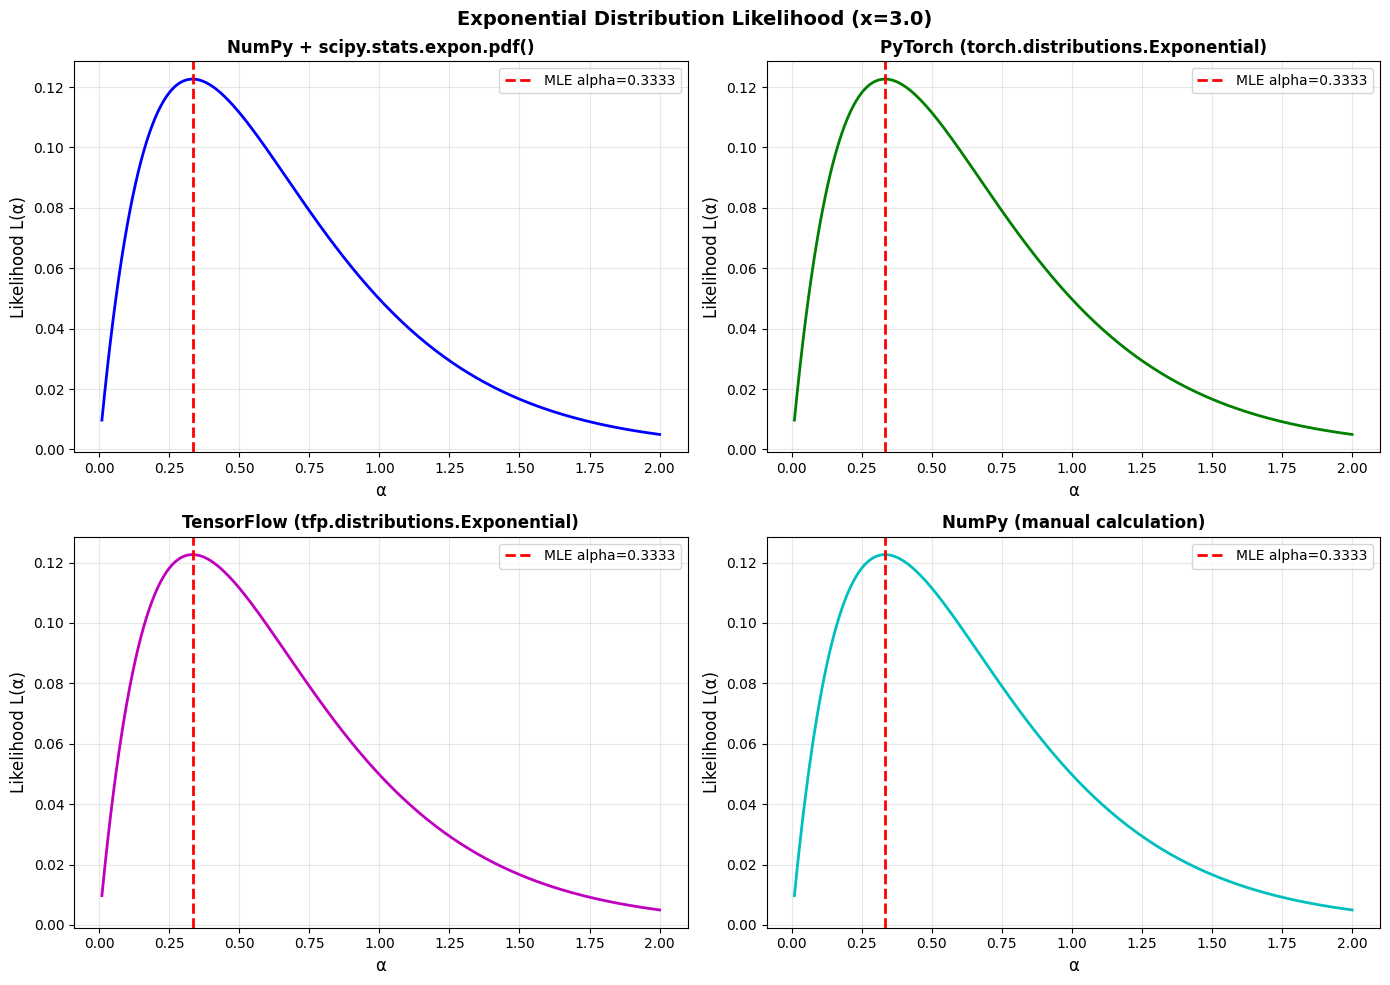


Exponential Distribution MLE - Exercise 1
Observed: x = 3.0
MLE: alpha = 1/x = 0.3333

All implementations confirm: alpha = 1/3 ~ 0.3333


In [32]:
import numpy as np
import torch
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from scipy.stats import expon

x_observed = 3.0
alpha_mle = 1 / x_observed
alpha_range = np.linspace(0.01, 2, 200)

# NumPy (scipy.expon uses scale=1/rate)
likelihoods_np = [expon.pdf(x_observed, scale=1/alpha) for alpha in alpha_range]

# PyTorch
likelihoods_torch = []
for alpha in alpha_range:
    exp_dist = torch.distributions.Exponential(rate=alpha)
    prob = torch.exp(exp_dist.log_prob(torch.tensor(x_observed)))
    likelihoods_torch.append(prob.item())

# TensorFlow
likelihoods_tf = []
for alpha in alpha_range:
    exp_dist = tfp.distributions.Exponential(rate=alpha)
    prob = tf.exp(exp_dist.log_prob(x_observed))
    likelihoods_tf.append(prob.numpy())

# NumPy (manual calculation)
likelihoods_np_manual = alpha_range * np.exp(-alpha_range * x_observed)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# NumPy
axes[0,0].plot(alpha_range, likelihoods_np, 'b-', linewidth=2)
axes[0,0].axvline(alpha_mle, color='red', linestyle='--', linewidth=2, label=f'MLE alpha={alpha_mle:.4f}')
axes[0,0].set_xlabel('α', fontsize=12)
axes[0,0].set_ylabel('Likelihood L(α)', fontsize=12)
axes[0,0].set_title('NumPy + scipy.stats.expon.pdf()', fontsize=12, fontweight='bold')
axes[0,0].legend(fontsize=10)
axes[0,0].grid(True, alpha=0.3)

# PyTorch
axes[0,1].plot(alpha_range, likelihoods_torch, 'g-', linewidth=2)
axes[0,1].axvline(alpha_mle, color='red', linestyle='--', linewidth=2, label=f'MLE alpha={alpha_mle:.4f}')
axes[0,1].set_xlabel('α', fontsize=12)
axes[0,1].set_ylabel('Likelihood L(α)', fontsize=12)
axes[0,1].set_title('PyTorch (torch.distributions.Exponential)', fontsize=12, fontweight='bold')
axes[0,1].legend(fontsize=10)
axes[0,1].grid(True, alpha=0.3)

# TensorFlow
axes[1,0].plot(alpha_range, likelihoods_tf, 'm-', linewidth=2)
axes[1,0].axvline(alpha_mle, color='red', linestyle='--', linewidth=2, label=f'MLE alpha={alpha_mle:.4f}')
axes[1,0].set_xlabel('α', fontsize=12)
axes[1,0].set_ylabel('Likelihood L(α)', fontsize=12)
axes[1,0].set_title('TensorFlow (tfp.distributions.Exponential)', fontsize=12, fontweight='bold')
axes[1,0].legend(fontsize=10)
axes[1,0].grid(True, alpha=0.3)

# NumPy (manual)
axes[1,1].plot(alpha_range, likelihoods_np_manual, 'c-', linewidth=2)
axes[1,1].axvline(alpha_mle, color='red', linestyle='--', linewidth=2, label=f'MLE alpha={alpha_mle:.4f}')
axes[1,1].set_xlabel('α', fontsize=12)
axes[1,1].set_ylabel('Likelihood L(α)', fontsize=12)
axes[1,1].set_title('NumPy (manual calculation)', fontsize=12, fontweight='bold')
axes[1,1].legend(fontsize=10)
axes[1,1].grid(True, alpha=0.3)

plt.suptitle(f'Exponential Distribution Likelihood (x={x_observed})', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f"Exponential Distribution MLE - Exercise 1")
print(f"{'='*60}")
print(f"Observed: x = {x_observed}")
print(f"MLE: alpha = 1/x = {alpha_mle:.4f}")
print(f"\nAll implementations confirm: alpha = 1/3 ~ 0.3333")
print(f"{'='*60}")

### 3.2. Exercise 2

**Problem:**

Given observations $X = \{x_1, x_2, \ldots, x_n\}$ from a Gaussian distribution with unknown mean $\mu$ and variance = 1, the likelihood is:

$$
L(\mu) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{(x_i-\mu)^2}{2}\right)
$$

Find the Maximum Likelihood Estimator (MLE) for the mean $\mu$.

### Solution:

**Step 1: Write the Likelihood Clearly**

$$
L(\mu) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{(x_i-\mu)^2}{2}\right)
$$

**Step 2: Convert to Log-Likelihood to Simplify**

Taking the natural logarithm:

$$
l(\mu) = \log L(\mu) = \sum_{i=1}^{n} \log \frac{1}{\sqrt{2\pi}} - \frac{1}{2}\sum_{i=1}^{n}(x_i-\mu)^2
$$

Note that the first term (constant) is independent of $\mu$, thus to maximize we only focus on minimizing:

$$
-\frac{1}{2}\sum_{i=1}^{n}(x_i-\mu)^2
$$

**Step 3: Differentiate and Set Equal to Zero**

Differentiate clearly:

$$
\frac{d}{d\mu}\left(-\frac{1}{2}\sum_{i=1}^{n}(x_i-\mu)^2\right) = -\frac{1}{2}\sum_{i=1}^{n}2(x_i-\mu)(-1) = \sum_{i=1}^{n}(x_i-\mu)
$$

Set equal to zero to find the maximum:

$$
\sum_{i=1}^{n}(x_i-\mu) = 0
$$

**Step 4: Solve Explicitly for μ**

Solve explicitly for $\mu$:

$$
\sum_{i=1}^{n} x_i - n\mu = 0 \quad \Rightarrow \quad \hat{\mu} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

Thus, we clearly obtain the MLE for mean as the arithmetic average:

$$
\hat{\mu} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

**Interpretation:** The MLE for the mean of a Gaussian distribution is simply the sample mean. This is an intuitive and well-known result in statistics.


### Concrete Numerical Example:

Suppose we have 4 observations from a Gaussian distribution (variance=1):

| Observation | Value $x_i$ |
| --- | --- |
| 1           | 5           |
| 2           | 7           |
| 3           | 9           |
| 4           | 11          |

Calculate the MLE for $\mu$:

- Clearly sum observations:

$$
5 + 7 + 9 + 11 = 32
$$

- Divide by $n = 4$:

$$
\hat{\mu} = \frac{32}{4} = 8
$$

Thus, the MLE for the mean clearly is **8**.

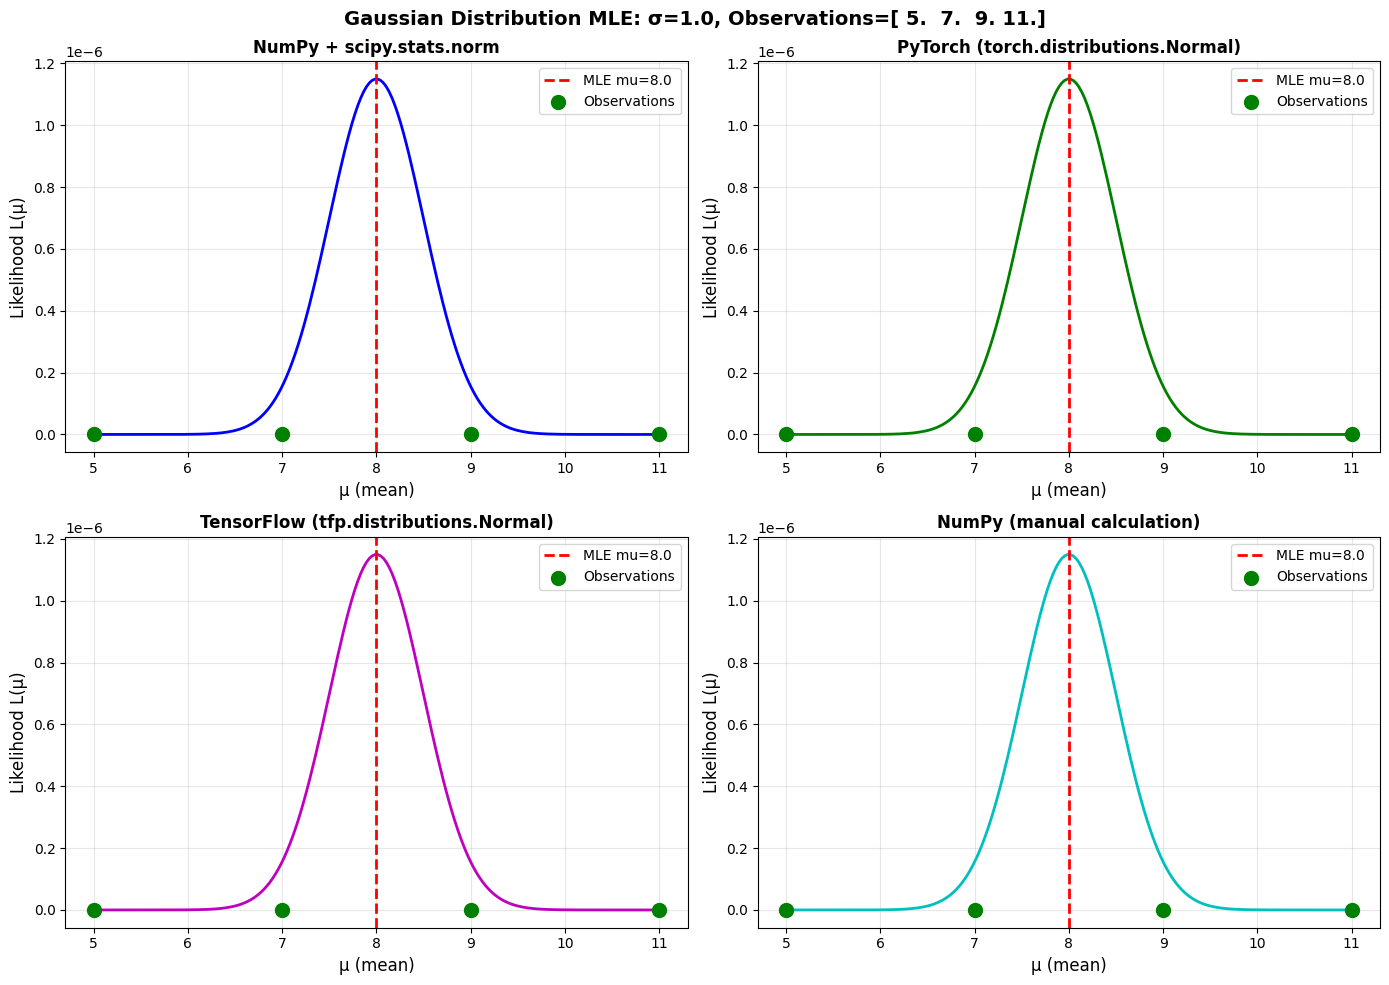


Gaussian Distribution MLE - Exercise 2
Observations: [ 5.  7.  9. 11.]
Known std: sigma = 1.0

MLE Formula: mu = (1/n)*sum(xi) = (1/4)(5+7+9+11) = 8

MLE Results:
  NumPy:      8.0000
  PyTorch:    8.0000
  TensorFlow: 8.0000

Log-Likelihood at MLE:
  NumPy:      -13.6758
  PyTorch:    -13.6758
  TensorFlow: -13.6758

All frameworks confirm: mu = 8.0


In [33]:
import numpy as np
from scipy.stats import norm
import torch
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt

observations = np.array([5.0, 7.0, 9.0, 11.0])
known_std = 1.0

# NumPy
mu_hat_np = np.mean(observations)
gaussian_np = norm(mu_hat_np, known_std)
log_likelihood_np = gaussian_np.logpdf(observations).sum()

mu_range = np.linspace(5, 11, 200)
likelihoods_np = np.array([np.exp(norm(mu, known_std).logpdf(observations).sum()) 
                           for mu in mu_range])

# PyTorch
observations_torch = torch.tensor(observations, dtype=torch.float32)
mu_hat_torch = observations_torch.mean()
gaussian_torch = torch.distributions.Normal(mu_hat_torch, known_std)
log_likelihood_torch = gaussian_torch.log_prob(observations_torch).sum()

mu_range_torch = torch.linspace(5, 11, 200)
likelihoods_torch = torch.zeros(200)
for i, mu in enumerate(mu_range_torch):
    dist = torch.distributions.Normal(mu, known_std)
    likelihoods_torch[i] = torch.exp(dist.log_prob(observations_torch).sum())

# TensorFlow
observations_tf = tf.constant(observations, dtype=tf.float32)
mu_hat_tf = tf.reduce_mean(observations_tf)
gaussian_tf = tfp.distributions.Normal(mu_hat_tf, known_std)
log_likelihood_tf = tf.reduce_sum(gaussian_tf.log_prob(observations_tf))

mu_range_tf = tf.linspace(5.0, 11.0, 200)
likelihoods_tf = []
for mu in mu_range_tf:
    dist = tfp.distributions.Normal(mu, known_std)
    lik = tf.exp(tf.reduce_sum(dist.log_prob(observations_tf)))
    likelihoods_tf.append(lik.numpy())
likelihoods_tf = np.array(likelihoods_tf)

# NumPy (manual calculation)
likelihoods_np_manual = np.zeros(200)
for i, mu in enumerate(mu_range):
    pdf_values = (1 / np.sqrt(2 * np.pi * known_std**2)) * \
                 np.exp(-((observations - mu)**2) / (2 * known_std**2))
    likelihoods_np_manual[i] = np.prod(pdf_values)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# NumPy + SciPy
axes[0,0].plot(mu_range, likelihoods_np, 'b-', linewidth=2)
axes[0,0].axvline(mu_hat_np, color='red', linestyle='--', linewidth=2, 
                  label=f'MLE mu={mu_hat_np:.1f}')
axes[0,0].scatter(observations, [0]*len(observations), color='green', s=100, 
                  zorder=5, label='Observations')
axes[0,0].set_xlabel('μ (mean)', fontsize=12)
axes[0,0].set_ylabel('Likelihood L(μ)', fontsize=12)
axes[0,0].set_title('NumPy + scipy.stats.norm', fontsize=12, fontweight='bold')
axes[0,0].legend(fontsize=10)
axes[0,0].grid(True, alpha=0.3)

# PyTorch
axes[0,1].plot(mu_range_torch.numpy(), likelihoods_torch.numpy(), 'g-', linewidth=2)
axes[0,1].axvline(mu_hat_torch.item(), color='red', linestyle='--', linewidth=2,
                  label=f'MLE mu={mu_hat_torch.item():.1f}')
axes[0,1].scatter(observations, [0]*len(observations), color='green', s=100,
                  zorder=5, label='Observations')
axes[0,1].set_xlabel('μ (mean)', fontsize=12)
axes[0,1].set_ylabel('Likelihood L(μ)', fontsize=12)
axes[0,1].set_title('PyTorch (torch.distributions.Normal)', fontsize=12, fontweight='bold')
axes[0,1].legend(fontsize=10)
axes[0,1].grid(True, alpha=0.3)

# TensorFlow
axes[1,0].plot(mu_range_tf.numpy(), likelihoods_tf, 'm-', linewidth=2)
axes[1,0].axvline(mu_hat_tf.numpy(), color='red', linestyle='--', linewidth=2,
                  label=f'MLE mu={mu_hat_tf.numpy():.1f}')
axes[1,0].scatter(observations, [0]*len(observations), color='green', s=100,
                  zorder=5, label='Observations')
axes[1,0].set_xlabel('μ (mean)', fontsize=12)
axes[1,0].set_ylabel('Likelihood L(μ)', fontsize=12)
axes[1,0].set_title('TensorFlow (tfp.distributions.Normal)', fontsize=12, fontweight='bold')
axes[1,0].legend(fontsize=10)
axes[1,0].grid(True, alpha=0.3)

# NumPy (manual)
axes[1,1].plot(mu_range, likelihoods_np_manual, 'c-', linewidth=2)
axes[1,1].axvline(mu_hat_np, color='red', linestyle='--', linewidth=2,
                  label=f'MLE mu={mu_hat_np:.1f}')
axes[1,1].scatter(observations, [0]*len(observations), color='green', s=100,
                  zorder=5, label='Observations')
axes[1,1].set_xlabel('μ (mean)', fontsize=12)
axes[1,1].set_ylabel('Likelihood L(μ)', fontsize=12)
axes[1,1].set_title('NumPy (manual calculation)', fontsize=12, fontweight='bold')
axes[1,1].legend(fontsize=10)
axes[1,1].grid(True, alpha=0.3)

plt.suptitle(f'Gaussian Distribution MLE: σ={known_std}, Observations={observations}', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print(f"Gaussian Distribution MLE - Exercise 2")
print(f"{'='*70}")
print(f"Observations: {observations}")
print(f"Known std: sigma = {known_std}")
print(f"\nMLE Formula: mu = (1/n)*sum(xi) = (1/4)(5+7+9+11) = 8")
print(f"\nMLE Results:")
print(f"  NumPy:      {mu_hat_np:.4f}")
print(f"  PyTorch:    {mu_hat_torch.item():.4f}")
print(f"  TensorFlow: {mu_hat_tf.numpy():.4f}")
print(f"\nLog-Likelihood at MLE:")
print(f"  NumPy:      {log_likelihood_np:.4f}")
print(f"  PyTorch:    {log_likelihood_torch.item():.4f}")
print(f"  TensorFlow: {log_likelihood_tf.numpy():.4f}")
print(f"\nAll frameworks confirm: mu = 8.0")
print(f"{'='*70}")

## References

[1] Zhang, A., Lipton, Z. C., Li, M., & Smola, A. J. (2023). *Dive into Deep Learning*. Cambridge University Press. Retrieved from https://d2l.ai
   - Chapter 22.7: Maximum Likelihood Estimation
   - Chapter 22.9: Naive Bayes

[2] Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*. Springer.
   - Chapter 1: Introduction (pp. 21-24)
   - Chapter 2: Probability Distributions (pp. 67-88)

[3] Murphy, K. P. (2012). *Machine Learning: A Probabilistic Perspective*. MIT Press.
   - Chapter 2: Probability (pp. 35-59)
   - Chapter 9: Generative Models for Discrete Data (pp. 259-287)